LAB Assignment 6: EDA on Gait Dataset
---------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------

Assigning Date : 08-Feb-2021  
Due Date: 14-Feb-2021

Name:Rohit Byas

Roll No: 181210043

------------------------------------------------------------------------

In \[14\]:

    try:
        from google.colab import drive
        %tensorflow_version 2.x
        COLAB = True
        print("Assignment 6")
        print("Note: using Google CoLab")
    except:
        print("Assignment 6")
        print("Note: not using Google CoLab")
        COLAB = False

    Assignment 6
    Note: not using Google CoLab

In \[15\]:

    print("Rohit Byas", "\nRoll Number: 181210043")

    Rohit Byas
    Roll Number: 181210043

In \[16\]:

    from datetime import date, datetime

    today = date.today()
    print("Current Date:", today)

    Current Date: 2021-02-14

In \[17\]:

    now = datetime.now()
    print(now.strftime("Current Time: %H:%M:%S"))

    Current Time: 20:49:01

------------------------------------------------------------------------

### Assignment Solutions
In \[18\]:

    # Needed dependency to read xlsx files using pandas
    !pip install openpyxl

    Requirement already satisfied: openpyxl in c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages (3.0.6)
    Requirement already satisfied: et-xmlfile in c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages (from openpyxl) (1.0.1)
    Requirement already satisfied: jdcal in c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages (from openpyxl) (1.4.1)

In \[19\]:

    !pip install scipy

    Requirement already satisfied: scipy in c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages (1.6.0)
    Requirement already satisfied: numpy>=1.16.5 in c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages (from scipy) (1.19.5)

In \[20\]:

    # Importing required libraries:
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import stats
    import seaborn as sns
    import math
    from sklearn import preprocessing
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

#### 4.0.1 Task 1: Getting to Know Your Data<a href="#4.0.1-Task-1:-Getting-to-Know-Your-Data" class="anchor-link">¶</a>

#### 4.0.2 Read Dataset from the link from LAB 1 \[ DM\_Gait.xlsx \]<a href="#4.0.2-Read-Dataset-from-the-link-from-LAB-1-%5B-DM_Gait.xlsx-%5D" class="anchor-link">¶</a>

In \[21\]:

    # Downloading the xlsx file:
    !gdown --id "1Kec4lVrgIi34Ty_3cvsbsWEojcr5_hMb"

    Downloading...
    From: https://drive.google.com/uc?id=1Kec4lVrgIi34Ty_3cvsbsWEojcr5_hMb
    To: D:\Desktop Files\Beeta\College\6th Semester - Study Materials\Data Mining\Lab\Lab6\assignment\DM_Gait.xlsx

      0%|          | 0.00/39.8k [00:00<?, ?B/s]
    100%|##########| 39.8k/39.8k [00:00<00:00, 2.29MB/s]
    [Errno 13] Permission denied: 'DM_Gait.xlsx'

In \[150\]:

    #Loading the excel file:
    xlsx = pd.ExcelFile('./DM_Gait.xlsx')

    #Declaring all_sheets list which will store all the sheets' dataframes
    all_sheets = []

    #Iterating through every sheet in the excel file and storing the data of each sheet in the all_sheets list:
    for sheet_name in xlsx.sheet_names:
        all_sheets.append({"name": sheet_name,
                            "df": pd.read_excel(xlsx, sheet_name)})

    c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
      warn(msg)

In \[151\]:

    #Deleting the last two null and duplicate rows:
    try:
        all_sheets[0]["df"] = all_sheets[0]["df"].drop(index=[113, 114], axis=1)
    except:
        print("Already deleted the rows!")

In \[152\]:

    #Displaying the first sheet (data):
    all_sheets[0]["df"]

Out\[152\]:

|     | S.No  | Subject \# | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No | Waist width (inches) | Bi-illiac width (m) |
|-----|-------|------------|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|---------|----------------------|---------------------|
| 0   | 1.0   | S21        | M      | 30.0       | 1.740      | 61.0        | 20.147972 | 0.930          | 0.52             | 0.410       | 0.075               | 0.260            | 8.0     | 31.0                 | 0.79                |
| 1   | 2.0   | S22        | M      | 27.0       | 1.855      | 65.9        | 19.151270 | 1.095          | 0.56             | 0.535       | 0.080               | 0.274            | 11.0    | 32.0                 | 0.81                |
| 2   | 3.0   | S23        | F      | 27.0       | 1.570      | 62.1        | 25.193720 | 0.815          | 0.46             | 0.355       | 0.650               | 0.235            | 5.0     | 34.0                 | 0.87                |
| 3   | 4.0   | S24        | F      | 22.0       | 1.580      | 59.5        | 23.834321 | 0.830          | 0.49             | 0.340       | 0.075               | 0.240            | 7.0     | 30.0                 | 0.76                |
| 4   | 5.0   | S25        | M      | 20.0       | 1.740      | 80.0        | 26.423570 | 0.840          | 0.47             | 0.370       | 0.080               | 0.240            | 8.0     | 34.0                 | 0.87                |
| ... | ...   | ...        | ...    | ...        | ...        | ...         | ...       | ...            | ...              | ...         | ...                 | ...              | ...     | ...                  | ...                 |
| 108 | 109.0 | S129       | M      | 30.0       | 1.800      | 85.0        | 26.234568 | 0.890          | 0.47             | 0.420       | 0.065               | 0.270            | 9.0     | 36.0                 | 0.92                |
| 109 | 110.0 | S130       | M      | 25.0       | 1.670      | 62.0        | 22.230987 | 0.980          | 0.49             | 0.490       | 0.070               | 0.250            | 8.0     | 32.0                 | 0.81                |
| 110 | 111.0 | S131       | M      | 28.0       | 1.700      | 68.0        | 23.529412 | 0.880          | 0.49             | 0.390       | 0.070               | 0.250            | 7.0     | 30.0                 | 0.76                |
| 111 | 112.0 | S132       | M      | 55.0       | 1.670      | 62.3        | 22.338556 | 0.900          | 0.49             | 0.410       | 0.060               | 0.260            | 8.0     | 32.0                 | 0.81                |
| 112 | 113.0 | S133       | M      | 42.0       | 1.680      | 60.2        | 21.329365 | 0.940          | 0.55             | 0.390       | 0.060               | 0.250            | 7.0     | 36.0                 | 0.92                |

113 rows × 15 columns

In \[153\]:

    #Deleting the last two null and duplicate rows:
    try:
        all_sheets[1]["df"] = all_sheets[1]["df"].drop(index=[113,114], axis=1)
    except:
        print("Already deleted the rows!")

In \[154\]:

    #Displaying the second sheet (Spatio_Temporal):
    all_sheets[1]["df"]

Out\[154\]:

|     | Unnamed: 0 | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|-----|------------|-----------|-----------|----------|------------|-------------|--------------|
| 0   | S21        | 66.001777 | 33.998223 | 1.096667 | 119.460451 | 1.211936    | 0.605968     |
| 1   | S22        | 71.024500 | 28.975500 | 0.953300 | 152.714500 | 1.179800    | 0.589900     |
| 2   | S23        | 69.542400 | 30.457600 | 1.067500 | 152.810000 | 1.102700    | 0.551300     |
| 3   | S24        | 63.074124 | 36.925876 | 1.170000 | 119.694881 | 1.337395    | 0.668697     |
| 4   | S25        | 68.209900 | 31.790100 | 0.995000 | 112.888200 | 0.964900    | 0.482400     |
| ... | ...        | ...       | ...       | ...      | ...        | ...         | ...          |
| 108 | S129       | 75.959118 | 24.040882 | 1.325000 | 135.792569 | 1.345380    | 0.672690     |
| 109 | S130       | 69.744575 | 30.255425 | 1.140000 | 138.123569 | 1.119287    | 0.559644     |
| 110 | S131       | 67.857143 | 25.373134 | 1.120000 | 144.827586 | 1.158621    | 0.579310     |
| 111 | S132       | 71.398990 | 28.601010 | 1.168000 | 152.549820 | 1.014113    | 0.507056     |
| 112 | S133       | 68.125641 | 31.874359 | 1.212000 | 121.590259 | 1.468966    | 0.734483     |

113 rows × 7 columns

In \[155\]:

    #Displaying the third sheet (Knee Angle):
    all_sheets[2]["df"]

Out\[155\]:

|     | Unnamed: 0 | Unnamed: 1 | Unnamed: 2 | Unnamed: 3 | Unnamed: 4 | Unnamed: 5 | Unnamed: 6 | Unnamed: 7 | Unnamed: 8 | Unnamed: 9 | ... | Unnamed: 53 | Unnamed: 54 | Unnamed: 55 | Unnamed: 56 | Unnamed: 57 | Unnamed: 58 | Unnamed: 59 | Unnamed: 60 | Unnamed: 61 | Unnamed: 62 |
|-----|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| 0   | S21        | -0.138624  | -0.105468  | 1.557842   | 4.082138   | 6.882636   | 9.716510   | 12.513191  | 15.092535  | 17.073290  | ... | 17.820437   | 12.233424   | 5.792605    | 1.088496    | -1.370223   | -3.892913   | -5.918308   | NaN         | NaN         | NaN         |
| 1   | S22        | 2.920620   | 2.814374   | 4.541029   | 7.271030   | 10.262650  | 13.046121  | 15.359428  | 17.062091  | 18.110126  | ... | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         |
| 2   | S23        | 7.497443   | 8.860625   | 11.240413  | 13.829357  | 16.133285  | 18.078403  | 19.672057  | 20.809789  | 21.370552  | ... | 8.859266    | 4.266635    | 1.198494    | 0.396979    | 0.082916    | NaN         | NaN         | NaN         | NaN         | NaN         |
| 3   | S24        | 6.076717   | 6.130036   | 7.605894   | 9.627953   | 11.463388  | 12.911771  | 14.191951  | 15.480457  | 16.639324  | ... | 36.555564   | 30.132454   | 23.713869   | 17.613616   | 12.304565   | 7.863246    | 4.000256    | 1.568352    | 0.748235    | 0.62004     |

4 rows × 63 columns

#### 4.1 1 a). How many Attribute (or dimensions, features, variables) are there in this dataset in all three different sheet (data and Spatio-Temporal )<a href="#4.1-1-a).-How-many-Attribute-(or-dimensions,-features,-variables)-are-there-in-this-dataset-in-all-three-different-sheet-(data-and-Spatio-Temporal-)" class="anchor-link">¶</a>

In \[156\]:

    #Iterating through every sheet and printing the number of columns:
    for sheet in range(len(all_sheets)):
        print("The number of attributes in", all_sheets[sheet]["name"], "is:", len(all_sheets[sheet]["df"].columns))

    The number of attributes in data is: 15
    The number of attributes in Spatio-Temporal is: 7
    The number of attributes in Knee_angle is: 63

#### 1 b). What are their Attributes Tyes \[Nominal / Binary / Ordinal attributes/ Numeric\] and Data types.<a href="#1-b).-What-are-their-Attributes-Tyes-%5BNominal-/-Binary-/-Ordinal-attributes/-Numeric%5D-and-Data-types." class="anchor-link">¶</a>

In \[157\]:

    #Displaying all the data types for each sheet:
    for sheet in range(len(all_sheets)):
        print("\nThe data types for", all_sheets[sheet]["name"], "are:\n", all_sheets[sheet]["df"].dtypes)
        print("------------------------------------------")

    The data types for data are:
     S.No                    float64
    Subject #                object
    Gender                   object
    Age (Year)              float64
    Height (m)              float64
    Weight (Kg)             float64
    BMI                     float64
    Leg Length (m)          float64
    Thigh Length (m)        float64
    Calf Length             float64
    Mallelous height -L     float64
    Foot Length (cM)        float64
    Shoe No                 float64
    Waist width (inches)    float64
    Bi-illiac width (m)     float64
    dtype: object
    ------------------------------------------

    The data types for Spatio-Temporal are:
     Unnamed: 0      object
    Stance         float64
    Swing          float64
    Velocity       float64
    Cadence        float64
    Stride_len     float64
    Step_Length    float64
    dtype: object
    ------------------------------------------

    The data types for Knee_angle are:
     Unnamed: 0      object
    Unnamed: 1     float64
    Unnamed: 2     float64
    Unnamed: 3     float64
    Unnamed: 4     float64
                    ...   
    Unnamed: 58    float64
    Unnamed: 59    float64
    Unnamed: 60    float64
    Unnamed: 61    float64
    Unnamed: 62    float64
    Length: 63, dtype: object
    ------------------------------------------

#### 1 c). How many data object (or samples , examples, instances, data points, objects, tuples) are there in this dataset<a href="#1-c).-How-many-data-object-(or-samples-,-examples,-instances,-data-points,-objects,-tuples)-are-there-in-this-dataset" class="anchor-link">¶</a>

In \[158\]:

    #Iterating through every sheet and printing the number of rows:
    for sheet in range(len(all_sheets)):
        print("The number of tuples in", all_sheets[sheet]["name"], "is:", len(all_sheets[sheet]["df"]))

    The number of tuples in data is: 113
    The number of tuples in Spatio-Temporal is: 113
    The number of tuples in Knee_angle is: 4

#### 4.1.1 TASK 2: Handle Missing Data<a href="#4.1.1-TASK-2:-Handle-Missing-Data" class="anchor-link">¶</a>

#### 2 a). Percentage of Missing DATA for each attributes<a href="#2-a).-Percentage-of-Missing-DATA-for-each-attributes" class="anchor-link">¶</a>

In \[159\]:

    for sheet in range(len(all_sheets)):
        null_count = all_sheets[sheet]["df"].isnull().sum()
        not_null_count = all_sheets[sheet]["df"].count(axis=0)
        percentage_of_null_count = null_count/(not_null_count+null_count)*100
        print("\nThe percentage of missing values in", all_sheets[sheet]["name"], "sheet is:\n", percentage_of_null_count)
        print("---------------------------------------------------------------")

    The percentage of missing values in data sheet is:
     S.No                    0.000000
    Subject #               0.000000
    Gender                  0.000000
    Age (Year)              0.000000
    Height (m)              2.654867
    Weight (Kg)             2.654867
    BMI                     2.654867
    Leg Length (m)          2.654867
    Thigh Length (m)        2.654867
    Calf Length             0.000000
    Mallelous height -L     2.654867
    Foot Length (cM)        2.654867
    Shoe No                 2.654867
    Waist width (inches)    2.654867
    Bi-illiac width (m)     2.654867
    dtype: float64
    ---------------------------------------------------------------

    The percentage of missing values in Spatio-Temporal sheet is:
     Unnamed: 0     0.000000
    Stance         2.654867
    Swing          2.654867
    Velocity       2.654867
    Cadence        2.654867
    Stride_len     2.654867
    Step_Length    2.654867
    dtype: float64
    ---------------------------------------------------------------

    The percentage of missing values in Knee_angle sheet is:
     Unnamed: 0      0.0
    Unnamed: 1      0.0
    Unnamed: 2      0.0
    Unnamed: 3      0.0
    Unnamed: 4      0.0
                   ... 
    Unnamed: 58    50.0
    Unnamed: 59    50.0
    Unnamed: 60    75.0
    Unnamed: 61    75.0
    Unnamed: 62    75.0
    Length: 63, dtype: float64
    ---------------------------------------------------------------

#### 2 b). Fill the Missing DATA<a href="#2-b).-Fill-the-Missing-DATA" class="anchor-link">¶</a>

In \[160\]:

    #Filling the missing data using linear interpolation:
    for sheet in range(len(all_sheets)):        
        all_sheets[sheet]["df"] = all_sheets[sheet]["df"].interpolate(method ='linear', limit_direction ='forward')

In \[161\]:

    #Printing the count of null values in each attribute for each sheet:
    for sheet in range(len(all_sheets)):        
        print("\nThe number of null values in", all_sheets[sheet]["name"], "is:\n", all_sheets[sheet]["df"].isnull().sum())
        print("----------------------------------------------------")

    The number of null values in data is:
     S.No                    0
    Subject #               0
    Gender                  0
    Age (Year)              0
    Height (m)              0
    Weight (Kg)             0
    BMI                     0
    Leg Length (m)          0
    Thigh Length (m)        0
    Calf Length             0
    Mallelous height -L     0
    Foot Length (cM)        0
    Shoe No                 0
    Waist width (inches)    0
    Bi-illiac width (m)     0
    dtype: int64
    ----------------------------------------------------

    The number of null values in Spatio-Temporal is:
     Unnamed: 0     0
    Stance         0
    Swing          0
    Velocity       0
    Cadence        0
    Stride_len     0
    Step_Length    0
    dtype: int64
    ----------------------------------------------------

    The number of null values in Knee_angle is:
     Unnamed: 0     0
    Unnamed: 1     0
    Unnamed: 2     0
    Unnamed: 3     0
    Unnamed: 4     0
                  ..
    Unnamed: 58    0
    Unnamed: 59    0
    Unnamed: 60    3
    Unnamed: 61    3
    Unnamed: 62    3
    Length: 63, dtype: int64
    ----------------------------------------------------

#### 4.1.2 TASK 3: Handling Noisy DATA / Outliers<a href="#4.1.2-TASK-3:-Handling-Noisy-DATA-/-Outliers" class="anchor-link">¶</a>

Binning  
– first sort data and partition into (equal-frequency) bins  
– then one can smooth by bin means, smooth by bin median, smooth by bin
boundaries, etc.

In \[162\]:

    #Merging the first and second sheet for easier coding:
    merged_df = pd.merge(all_sheets[0]["df"], all_sheets[1]["df"], right_on="Unnamed: 0", left_on="Subject #")
    merged_df = merged_df.drop(columns=['Unnamed: 0'])

In \[163\]:

    merged_df

Out\[163\]:

|     | S.No  | Subject \# | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | ... | Foot Length (cM) | Shoe No | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|-----|-------|------------|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|-----|------------------|---------|----------------------|---------------------|-----------|-----------|----------|------------|-------------|--------------|
| 0   | 1.0   | S21        | M      | 30.0       | 1.740      | 61.0        | 20.147972 | 0.930          | 0.52             | 0.410       | ... | 0.260            | 8.0     | 31.0                 | 0.79                | 66.001777 | 33.998223 | 1.096667 | 119.460451 | 1.211936    | 0.605968     |
| 1   | 2.0   | S22        | M      | 27.0       | 1.855      | 65.9        | 19.151270 | 1.095          | 0.56             | 0.535       | ... | 0.274            | 11.0    | 32.0                 | 0.81                | 71.024500 | 28.975500 | 0.953300 | 152.714500 | 1.179800    | 0.589900     |
| 2   | 3.0   | S23        | F      | 27.0       | 1.570      | 62.1        | 25.193720 | 0.815          | 0.46             | 0.355       | ... | 0.235            | 5.0     | 34.0                 | 0.87                | 69.542400 | 30.457600 | 1.067500 | 152.810000 | 1.102700    | 0.551300     |
| 3   | 4.0   | S24        | F      | 22.0       | 1.580      | 59.5        | 23.834321 | 0.830          | 0.49             | 0.340       | ... | 0.240            | 7.0     | 30.0                 | 0.76                | 63.074124 | 36.925876 | 1.170000 | 119.694881 | 1.337395    | 0.668697     |
| 4   | 5.0   | S25        | M      | 20.0       | 1.740      | 80.0        | 26.423570 | 0.840          | 0.47             | 0.370       | ... | 0.240            | 8.0     | 34.0                 | 0.87                | 68.209900 | 31.790100 | 0.995000 | 112.888200 | 0.964900    | 0.482400     |
| ... | ...   | ...        | ...    | ...        | ...        | ...         | ...       | ...            | ...              | ...         | ... | ...              | ...     | ...                  | ...                 | ...       | ...       | ...      | ...        | ...         | ...          |
| 108 | 109.0 | S129       | M      | 30.0       | 1.800      | 85.0        | 26.234568 | 0.890          | 0.47             | 0.420       | ... | 0.270            | 9.0     | 36.0                 | 0.92                | 75.959118 | 24.040882 | 1.325000 | 135.792569 | 1.345380    | 0.672690     |
| 109 | 110.0 | S130       | M      | 25.0       | 1.670      | 62.0        | 22.230987 | 0.980          | 0.49             | 0.490       | ... | 0.250            | 8.0     | 32.0                 | 0.81                | 69.744575 | 30.255425 | 1.140000 | 138.123569 | 1.119287    | 0.559644     |
| 110 | 111.0 | S131       | M      | 28.0       | 1.700      | 68.0        | 23.529412 | 0.880          | 0.49             | 0.390       | ... | 0.250            | 7.0     | 30.0                 | 0.76                | 67.857143 | 25.373134 | 1.120000 | 144.827586 | 1.158621    | 0.579310     |
| 111 | 112.0 | S132       | M      | 55.0       | 1.670      | 62.3        | 22.338556 | 0.900          | 0.49             | 0.410       | ... | 0.260            | 8.0     | 32.0                 | 0.81                | 71.398990 | 28.601010 | 1.168000 | 152.549820 | 1.014113    | 0.507056     |
| 112 | 113.0 | S133       | M      | 42.0       | 1.680      | 60.2        | 21.329365 | 0.940          | 0.55             | 0.390       | ... | 0.250            | 7.0     | 36.0                 | 0.92                | 68.125641 | 31.874359 | 1.212000 | 121.590259 | 1.468966    | 0.734483     |

113 rows × 21 columns

In \[164\]:

    def equifreq(arr1, m):
        final_list = []
        a = len(arr1)
        n = int(a / m)
        count = 0
        for i in range(0, m+1):
            arr = []
            if (count+n) > len(arr1):
                arr = arr1[count::]
            else:
                arr = arr1[count:count+n]
            count=count+n
            mean = (np.array(arr)).mean()
            arr = [mean for elem in arr]
            final_list.append(np.array(arr))
        return np.hstack(np.array(final_list, dtype=object))

    #Iterating through each column:
    for col in merged_df.columns[4::]:
        merged_df = merged_df.sort_values([col], ascending=True)
        col_list = list(merged_df[col])
        smoothened_binned_list = equifreq(col_list, 12)
        merged_df.drop(columns=[col])
        merged_df[col]=smoothened_binned_list

    merged_df = merged_df.sort_index()

In \[165\]:

    merged_df

Out\[165\]:

|     | S.No  | Subject \# | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | ... | Foot Length (cM) | Shoe No   | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|-----|-------|------------|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|-----|------------------|-----------|----------------------|---------------------|-----------|-----------|----------|------------|-------------|--------------|
| 0   | 1.0   | S21        | M      | 30.0       | 1.745556   | 61.811111   | 20.507301 | 0.935556       | 0.518889         | 0.412778    | ... | 0.257222         | 7.888889  | 31.166667            | 0.770000            | 66.287618 | 34.156404 | 1.095667 | 116.193079 | 1.219254    | 0.609627     |
| 1   | 2.0   | S22        | M      | 27.0       | 1.871000   | 66.622222   | 19.543862 | 1.019000       | 0.566000         | 0.506000    | ... | 0.274333         | 10.600000 | 32.000000            | 0.810000            | 71.031142 | 29.491189 | 0.982107 | 152.377421 | 1.194112    | 0.597056     |
| 2   | 3.0   | S23        | F      | 27.0       | 1.573889   | 61.811111   | 25.667457 | 0.816111       | 0.452778         | 0.355000    | ... | 0.237778         | 4.222222  | 34.055556            | 0.871111            | 69.149436 | 30.375243 | 1.048167 | 152.377421 | 1.102635    | 0.551312     |
| 3   | 4.0   | S24        | F      | 22.0       | 1.573889   | 59.977778   | 24.078185 | 0.816111       | 0.491667         | 0.201111    | ... | 0.240000         | 7.888889  | 30.000000            | 0.770000            | 62.518417 | 36.552756 | 1.173519 | 116.193079 | 1.341760    | 0.670880     |
| 4   | 5.0   | S25        | M      | 20.0       | 1.745556   | 78.755556   | 26.926892 | 0.846667       | 0.474444         | 0.369444    | ... | 0.237778         | 8.000000  | 33.277778            | 0.871111            | 68.309698 | 31.951000 | 0.982107 | 116.193079 | 0.978052    | 0.489026     |
| ... | ...   | ...        | ...    | ...        | ...        | ...         | ...       | ...            | ...              | ...         | ... | ...              | ...       | ...                  | ...                 | ...       | ...       | ...      | ...        | ...         | ...          |
| 108 | 109.0 | S129       | M      | 30.0       | 1.798889   | 83.888889   | 25.667457 | 0.897778       | 0.474444         | 0.421111    | ... | 0.274333         | 9.000000  | 35.888889            | 0.948889            | 76.611921 | 24.455553 | 1.311963 | 134.499768 | 1.341760    | 0.670880     |
| 109 | 110.0 | S130       | M      | 25.0       | 1.676667   | 61.811111   | 21.870881 | 0.962778       | 0.491667         | 0.462222    | ... | 0.247778         | 8.000000  | 31.166667            | 0.844444            | 69.817934 | 30.375243 | 1.132185 | 139.062700 | 1.129536    | 0.564768     |
| 110 | 111.0 | S131       | M      | 28.0       | 1.694444   | 66.622222   | 23.517249 | 0.880000       | 0.491667         | 0.388889    | ... | 0.247778         | 6.666667  | 30.000000            | 0.760000            | 67.640897 | 24.455553 | 1.118593 | 143.355290 | 1.167500    | 0.583750     |
| 111 | 112.0 | S132       | M      | 55.0       | 1.661667   | 61.811111   | 22.661131 | 0.905556       | 0.486667         | 0.412778    | ... | 0.260417         | 7.888889  | 32.000000            | 0.810000            | 71.031142 | 28.020426 | 1.173519 | 152.377421 | 0.978052    | 0.489026     |
| 112 | 113.0 | S133       | M      | 42.0       | 1.676667   | 59.977778   | 21.079829 | 0.935556       | 0.537778         | 0.388889    | ... | 0.250000         | 7.000000  | 35.888889            | 0.916667            | 68.309698 | 31.951000 | 1.196333 | 121.812645 | 1.476545    | 0.738273     |

113 rows × 21 columns

Drop a column or Row

In \[166\]:

    #Dropping S.NO and Subject#:
    columns_to_delete = ["S.No ", "Subject #"]
    try:
        merged_df = merged_df.drop(columns=columns_to_delete)
    except:
        print("S.No and Subject # columns don't exist anymore.")

In \[167\]:

    #Displaying the dataframe after deleting:
    merged_df

Out\[167\]:

|     | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No   | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|-----|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|-----------|----------------------|---------------------|-----------|-----------|----------|------------|-------------|--------------|
| 0   | M      | 30.0       | 1.745556   | 61.811111   | 20.507301 | 0.935556       | 0.518889         | 0.412778    | 0.075000            | 0.257222         | 7.888889  | 31.166667            | 0.770000            | 66.287618 | 34.156404 | 1.095667 | 116.193079 | 1.219254    | 0.609627     |
| 1   | M      | 27.0       | 1.871000   | 66.622222   | 19.543862 | 1.019000       | 0.566000         | 0.506000    | 0.080000            | 0.274333         | 10.600000 | 32.000000            | 0.810000            | 71.031142 | 29.491189 | 0.982107 | 152.377421 | 1.194112    | 0.597056     |
| 2   | F      | 27.0       | 1.573889   | 61.811111   | 25.667457 | 0.816111       | 0.452778         | 0.355000    | 0.690000            | 0.237778         | 4.222222  | 34.055556            | 0.871111            | 69.149436 | 30.375243 | 1.048167 | 152.377421 | 1.102635    | 0.551312     |
| 3   | F      | 22.0       | 1.573889   | 59.977778   | 24.078185 | 0.816111       | 0.491667         | 0.201111    | 0.072778            | 0.240000         | 7.888889  | 30.000000            | 0.770000            | 62.518417 | 36.552756 | 1.173519 | 116.193079 | 1.341760    | 0.670880     |
| 4   | M      | 20.0       | 1.745556   | 78.755556   | 26.926892 | 0.846667       | 0.474444         | 0.369444    | 0.080000            | 0.237778         | 8.000000  | 33.277778            | 0.871111            | 68.309698 | 31.951000 | 0.982107 | 116.193079 | 0.978052    | 0.489026     |
| ... | ...    | ...        | ...        | ...         | ...       | ...            | ...              | ...         | ...                 | ...              | ...       | ...                  | ...                 | ...       | ...       | ...      | ...        | ...         | ...          |
| 108 | M      | 30.0       | 1.798889   | 83.888889   | 25.667457 | 0.897778       | 0.474444         | 0.421111    | 0.062778            | 0.274333         | 9.000000  | 35.888889            | 0.948889            | 76.611921 | 24.455553 | 1.311963 | 134.499768 | 1.341760    | 0.670880     |
| 109 | M      | 25.0       | 1.676667   | 61.811111   | 21.870881 | 0.962778       | 0.491667         | 0.462222    | 0.070000            | 0.247778         | 8.000000  | 31.166667            | 0.844444            | 69.817934 | 30.375243 | 1.132185 | 139.062700 | 1.129536    | 0.564768     |
| 110 | M      | 28.0       | 1.694444   | 66.622222   | 23.517249 | 0.880000       | 0.491667         | 0.388889    | 0.070000            | 0.247778         | 6.666667  | 30.000000            | 0.760000            | 67.640897 | 24.455553 | 1.118593 | 143.355290 | 1.167500    | 0.583750     |
| 111 | M      | 55.0       | 1.661667   | 61.811111   | 22.661131 | 0.905556       | 0.486667         | 0.412778    | 0.054444            | 0.260417         | 7.888889  | 32.000000            | 0.810000            | 71.031142 | 28.020426 | 1.173519 | 152.377421 | 0.978052    | 0.489026     |
| 112 | M      | 42.0       | 1.676667   | 59.977778   | 21.079829 | 0.935556       | 0.537778         | 0.388889    | 0.062778            | 0.250000         | 7.000000  | 35.888889            | 0.916667            | 68.309698 | 31.951000 | 1.196333 | 121.812645 | 1.476545    | 0.738273     |

113 rows × 19 columns

#### 4.1.3 TASK 4: Features encoding and decoding<a href="#4.1.3-TASK-4:-Features-encoding-and-decoding" class="anchor-link">¶</a>

In \[168\]:

    # Identify the feature/s that needs encoding
    # We need to map gender to a numerical 0 or 1; and map ages into a range

In \[169\]:

    #Mapping gender:
    genders = {"M": 0, "F": 1, 
               1: 1, 0: 0}
    merged_df['Gender'] = merged_df['Gender'].map(genders)

In \[170\]:

    merged_df

Out\[170\]:

|     | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No   | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|-----|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|-----------|----------------------|---------------------|-----------|-----------|----------|------------|-------------|--------------|
| 0   | 0      | 30.0       | 1.745556   | 61.811111   | 20.507301 | 0.935556       | 0.518889         | 0.412778    | 0.075000            | 0.257222         | 7.888889  | 31.166667            | 0.770000            | 66.287618 | 34.156404 | 1.095667 | 116.193079 | 1.219254    | 0.609627     |
| 1   | 0      | 27.0       | 1.871000   | 66.622222   | 19.543862 | 1.019000       | 0.566000         | 0.506000    | 0.080000            | 0.274333         | 10.600000 | 32.000000            | 0.810000            | 71.031142 | 29.491189 | 0.982107 | 152.377421 | 1.194112    | 0.597056     |
| 2   | 1      | 27.0       | 1.573889   | 61.811111   | 25.667457 | 0.816111       | 0.452778         | 0.355000    | 0.690000            | 0.237778         | 4.222222  | 34.055556            | 0.871111            | 69.149436 | 30.375243 | 1.048167 | 152.377421 | 1.102635    | 0.551312     |
| 3   | 1      | 22.0       | 1.573889   | 59.977778   | 24.078185 | 0.816111       | 0.491667         | 0.201111    | 0.072778            | 0.240000         | 7.888889  | 30.000000            | 0.770000            | 62.518417 | 36.552756 | 1.173519 | 116.193079 | 1.341760    | 0.670880     |
| 4   | 0      | 20.0       | 1.745556   | 78.755556   | 26.926892 | 0.846667       | 0.474444         | 0.369444    | 0.080000            | 0.237778         | 8.000000  | 33.277778            | 0.871111            | 68.309698 | 31.951000 | 0.982107 | 116.193079 | 0.978052    | 0.489026     |
| ... | ...    | ...        | ...        | ...         | ...       | ...            | ...              | ...         | ...                 | ...              | ...       | ...                  | ...                 | ...       | ...       | ...      | ...        | ...         | ...          |
| 108 | 0      | 30.0       | 1.798889   | 83.888889   | 25.667457 | 0.897778       | 0.474444         | 0.421111    | 0.062778            | 0.274333         | 9.000000  | 35.888889            | 0.948889            | 76.611921 | 24.455553 | 1.311963 | 134.499768 | 1.341760    | 0.670880     |
| 109 | 0      | 25.0       | 1.676667   | 61.811111   | 21.870881 | 0.962778       | 0.491667         | 0.462222    | 0.070000            | 0.247778         | 8.000000  | 31.166667            | 0.844444            | 69.817934 | 30.375243 | 1.132185 | 139.062700 | 1.129536    | 0.564768     |
| 110 | 0      | 28.0       | 1.694444   | 66.622222   | 23.517249 | 0.880000       | 0.491667         | 0.388889    | 0.070000            | 0.247778         | 6.666667  | 30.000000            | 0.760000            | 67.640897 | 24.455553 | 1.118593 | 143.355290 | 1.167500    | 0.583750     |
| 111 | 0      | 55.0       | 1.661667   | 61.811111   | 22.661131 | 0.905556       | 0.486667         | 0.412778    | 0.054444            | 0.260417         | 7.888889  | 32.000000            | 0.810000            | 71.031142 | 28.020426 | 1.173519 | 152.377421 | 0.978052    | 0.489026     |
| 112 | 0      | 42.0       | 1.676667   | 59.977778   | 21.079829 | 0.935556       | 0.537778         | 0.388889    | 0.062778            | 0.250000         | 7.000000  | 35.888889            | 0.916667            | 68.309698 | 31.951000 | 1.196333 | 121.812645 | 1.476545    | 0.738273     |

113 rows × 19 columns

In \[171\]:

    age_already_categorized = False

In \[172\]:

    #Mapping ages to a range:

    if not age_already_categorized:
        #Rounding the min and max to be divisible by 10:
        min = int(merged_df['Age (Year)'].min())
        min = min - (min%10)
        max = int(merged_df['Age (Year)'].max())
        max = max + (10-(max%10)) +1

        age_ranges = list(range(min, max, 10))
        merged_df['Age (Year)'] = merged_df['Age (Year)'].astype(int)

        for x in range(len(age_ranges)-1):
            merged_df.loc[(merged_df['Age (Year)']>age_ranges[x]) & (merged_df['Age (Year)']<=age_ranges[x+1]), 'Age (Year)'] = x

        age_already_categorized = True
        
    else:
        print("Already categorized the ages into their ranges")

In \[173\]:

    #Displaying the dataframe:
    merged_df

Out\[173\]:

|     | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No   | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|-----|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|-----------|----------------------|---------------------|-----------|-----------|----------|------------|-------------|--------------|
| 0   | 0      | 2          | 1.745556   | 61.811111   | 20.507301 | 0.935556       | 0.518889         | 0.412778    | 0.075000            | 0.257222         | 7.888889  | 31.166667            | 0.770000            | 66.287618 | 34.156404 | 1.095667 | 116.193079 | 1.219254    | 0.609627     |
| 1   | 0      | 2          | 1.871000   | 66.622222   | 19.543862 | 1.019000       | 0.566000         | 0.506000    | 0.080000            | 0.274333         | 10.600000 | 32.000000            | 0.810000            | 71.031142 | 29.491189 | 0.982107 | 152.377421 | 1.194112    | 0.597056     |
| 2   | 1      | 2          | 1.573889   | 61.811111   | 25.667457 | 0.816111       | 0.452778         | 0.355000    | 0.690000            | 0.237778         | 4.222222  | 34.055556            | 0.871111            | 69.149436 | 30.375243 | 1.048167 | 152.377421 | 1.102635    | 0.551312     |
| 3   | 1      | 2          | 1.573889   | 59.977778   | 24.078185 | 0.816111       | 0.491667         | 0.201111    | 0.072778            | 0.240000         | 7.888889  | 30.000000            | 0.770000            | 62.518417 | 36.552756 | 1.173519 | 116.193079 | 1.341760    | 0.670880     |
| 4   | 0      | 1          | 1.745556   | 78.755556   | 26.926892 | 0.846667       | 0.474444         | 0.369444    | 0.080000            | 0.237778         | 8.000000  | 33.277778            | 0.871111            | 68.309698 | 31.951000 | 0.982107 | 116.193079 | 0.978052    | 0.489026     |
| ... | ...    | ...        | ...        | ...         | ...       | ...            | ...              | ...         | ...                 | ...              | ...       | ...                  | ...                 | ...       | ...       | ...      | ...        | ...         | ...          |
| 108 | 0      | 2          | 1.798889   | 83.888889   | 25.667457 | 0.897778       | 0.474444         | 0.421111    | 0.062778            | 0.274333         | 9.000000  | 35.888889            | 0.948889            | 76.611921 | 24.455553 | 1.311963 | 134.499768 | 1.341760    | 0.670880     |
| 109 | 0      | 2          | 1.676667   | 61.811111   | 21.870881 | 0.962778       | 0.491667         | 0.462222    | 0.070000            | 0.247778         | 8.000000  | 31.166667            | 0.844444            | 69.817934 | 30.375243 | 1.132185 | 139.062700 | 1.129536    | 0.564768     |
| 110 | 0      | 2          | 1.694444   | 66.622222   | 23.517249 | 0.880000       | 0.491667         | 0.388889    | 0.070000            | 0.247778         | 6.666667  | 30.000000            | 0.760000            | 67.640897 | 24.455553 | 1.118593 | 143.355290 | 1.167500    | 0.583750     |
| 111 | 0      | 5          | 1.661667   | 61.811111   | 22.661131 | 0.905556       | 0.486667         | 0.412778    | 0.054444            | 0.260417         | 7.888889  | 32.000000            | 0.810000            | 71.031142 | 28.020426 | 1.173519 | 152.377421 | 0.978052    | 0.489026     |
| 112 | 0      | 4          | 1.676667   | 59.977778   | 21.079829 | 0.935556       | 0.537778         | 0.388889    | 0.062778            | 0.250000         | 7.000000  | 35.888889            | 0.916667            | 68.309698 | 31.951000 | 1.196333 | 121.812645 | 1.476545    | 0.738273     |

113 rows × 19 columns

#### 4.1.4 TASK 5: Basic Statistical Descriptions of DataSet<a href="#4.1.4-TASK-5:-Basic-Statistical-Descriptions-of-DataSet" class="anchor-link">¶</a>

4.1.5 Interpreting quantitative findings i.e. Descriptive Statistics:  
Write your own function to find following Descriptive Statistics
parameters for the attributes :  

-   count
-   Min
-   Max
-   Mean
-   Median
-   Mode
-   Midrange
-   Variance and
-   Standard deviation

#### Show the result of above Descriptive Statistics functions for the dataset.<a href="#Show-the-result-of-above-Descriptive-Statistics-functions-for-the-dataset." class="anchor-link">¶</a>

In \[174\]:

    all_properties = []

In \[175\]:

    #Count
    all_count = []

    for col in merged_df.columns:
        count = {
            "attribute": col,
            "value": len(merged_df[col])
        }
        all_count.append(count)
        
    all_properties.append({"property": "count", "values": all_count})

    count_df = pd.DataFrame(all_count)
    count_df

Out\[175\]:

|     | attribute            | value |
|-----|----------------------|-------|
| 0   | Gender               | 113   |
| 1   | Age (Year)           | 113   |
| 2   | Height (m)           | 113   |
| 3   | Weight (Kg)          | 113   |
| 4   | BMI                  | 113   |
| 5   | Leg Length (m)       | 113   |
| 6   | Thigh Length (m)     | 113   |
| 7   | Calf Length          | 113   |
| 8   | Mallelous height -L  | 113   |
| 9   | Foot Length (cM)     | 113   |
| 10  | Shoe No              | 113   |
| 11  | Waist width (inches) | 113   |
| 12  | Bi-illiac width (m)  | 113   |
| 13  | Stance               | 113   |
| 14  | Swing                | 113   |
| 15  | Velocity             | 113   |
| 16  | Cadence              | 113   |
| 17  | Stride\_len          | 113   |
| 18  | Step\_Length         | 113   |

In \[176\]:

    #Min
    all_min = []

    for col in merged_df.columns:
        min = {
            "attribute": col,
            "value": np.amin(np.array(merged_df[col]))
        }
        all_min.append(min)
        
    all_properties.append({"property": "min", "values": all_min})

    min_df = pd.DataFrame(all_min)
    min_df

Out\[176\]:

|     | attribute            | value     |
|-----|----------------------|-----------|
| 0   | Gender               | 0.000000  |
| 1   | Age (Year)           | 0.000000  |
| 2   | Height (m)           | 1.444444  |
| 3   | Weight (Kg)          | 41.244444 |
| 4   | BMI                  | 17.033706 |
| 5   | Leg Length (m)       | 0.748333  |
| 6   | Thigh Length (m)     | 0.399444  |
| 7   | Calf Length          | 0.201111  |
| 8   | Mallelous height -L  | 0.054444  |
| 9   | Foot Length (cM)     | 0.211667  |
| 10  | Shoe No              | 4.222222  |
| 11  | Waist width (inches) | 27.444444 |
| 12  | Bi-illiac width (m)  | 0.686667  |
| 13  | Stance               | 59.972090 |
| 14  | Swing                | 24.455553 |
| 15  | Velocity             | 0.982107  |
| 16  | Cadence              | 92.141404 |
| 17  | Stride\_len          | 0.978052  |
| 18  | Step\_Length         | 0.489026  |

In \[177\]:

    #Max:
    all_max = []

    for col in merged_df.columns:
        max = {
            "attribute": col,
            "value": np.amax(np.array(merged_df[col]))
        }
        all_max.append(max)
        
    all_properties.append({"property": "max", "values": all_max})

    max_df = pd.DataFrame(all_max)
    max_df

Out\[177\]:

|     | attribute            | value      |
|-----|----------------------|------------|
| 0   | Gender               | 1.000000   |
| 1   | Age (Year)           | 5.000000   |
| 2   | Height (m)           | 1.871000   |
| 3   | Weight (Kg)          | 103.820000 |
| 4   | BMI                  | 33.102478  |
| 5   | Leg Length (m)       | 1.019000   |
| 6   | Thigh Length (m)     | 0.566000   |
| 7   | Calf Length          | 0.506000   |
| 8   | Mallelous height -L  | 0.690000   |
| 9   | Foot Length (cM)     | 0.291000   |
| 10  | Shoe No              | 10.600000  |
| 11  | Waist width (inches) | 39.200000  |
| 12  | Bi-illiac width (m)  | 0.996000   |
| 13  | Stance               | 76.611921  |
| 14  | Swing                | 40.719783  |
| 15  | Velocity             | 1.555133   |
| 16  | Cadence              | 181.252880 |
| 17  | Stride\_len          | 1.606366   |
| 18  | Step\_Length         | 0.803183   |

In \[178\]:

    #Mean:
    all_mean = []

    for col in merged_df.columns:
        mean = {
            "attribute": col,
            "value": np.mean(np.array(merged_df[col]))
        }
        all_mean.append(mean)
        
    all_properties.append({"property": "mean", "values": all_mean})

    mean_df = pd.DataFrame(all_mean)
    mean_df

Out\[178\]:

|     | attribute            | value      |
|-----|----------------------|------------|
| 0   | Gender               | 0.247788   |
| 1   | Age (Year)           | 2.212389   |
| 2   | Height (m)           | 1.681018   |
| 3   | Weight (Kg)          | 66.938938  |
| 4   | BMI                  | 23.499537  |
| 5   | Leg Length (m)       | 0.884602   |
| 6   | Thigh Length (m)     | 0.480221   |
| 7   | Calf Length          | 0.393894   |
| 8   | Mallelous height -L  | 0.110796   |
| 9   | Foot Length (cM)     | 0.251093   |
| 10  | Shoe No              | 7.663717   |
| 11  | Waist width (inches) | 32.845133  |
| 12  | Bi-illiac width (m)  | 0.833451   |
| 13  | Stance               | 67.422111  |
| 14  | Swing                | 32.514351  |
| 15  | Velocity             | 1.179267   |
| 16  | Cadence              | 137.741276 |
| 17  | Stride\_len          | 1.235066   |
| 18  | Step\_Length         | 0.617533   |

In \[179\]:

    #Median:
    all_median = []

    for col in merged_df.columns:
        median = {
            "attribute": col,
            "value": np.median(np.array(merged_df[col]))
        }
        all_median.append(median)
        
    all_properties.append({"property": "median", "values": all_median})

    median_df = pd.DataFrame(all_median)
    median_df

Out\[179\]:

|     | attribute            | value      |
|-----|----------------------|------------|
| 0   | Gender               | 0.000000   |
| 1   | Age (Year)           | 2.000000   |
| 2   | Height (m)           | 1.694444   |
| 3   | Weight (Kg)          | 66.622222  |
| 4   | BMI                  | 23.517249  |
| 5   | Leg Length (m)       | 0.889722   |
| 6   | Thigh Length (m)     | 0.486667   |
| 7   | Calf Length          | 0.401111   |
| 8   | Mallelous height -L  | 0.070000   |
| 9   | Foot Length (cM)     | 0.250000   |
| 10  | Shoe No              | 8.000000   |
| 11  | Waist width (inches) | 32.000000  |
| 12  | Bi-illiac width (m)  | 0.810000   |
| 13  | Stance               | 67.640897  |
| 14  | Swing                | 32.618600  |
| 15  | Velocity             | 1.154481   |
| 16  | Cadence              | 139.062700 |
| 17  | Stride\_len          | 1.219254   |
| 18  | Step\_Length         | 0.609627   |

In \[180\]:

    #Mode:
    all_mode = []

    for col in merged_df.columns:
        mode = {
            "attribute": col,
            "value": stats.mode(np.array(merged_df[col]))[0][0],
            "occurance": stats.mode(np.array(merged_df[col]))[1][0]
        }
        all_mode.append(mode)
        
    all_properties.append({"property": "mode", "values": all_mode})

    mode_df = pd.DataFrame(all_mode)
    mode_df

Out\[180\]:

|     | attribute            | value     | occurance |
|-----|----------------------|-----------|-----------|
| 0   | Gender               | 0.000000  | 85        |
| 1   | Age (Year)           | 2.000000  | 67        |
| 2   | Height (m)           | 1.444444  | 9         |
| 3   | Weight (Kg)          | 41.244444 | 9         |
| 4   | BMI                  | 17.033706 | 9         |
| 5   | Leg Length (m)       | 0.748333  | 9         |
| 6   | Thigh Length (m)     | 0.399444  | 9         |
| 7   | Calf Length          | 0.201111  | 9         |
| 8   | Mallelous height -L  | 0.070000  | 36        |
| 9   | Foot Length (cM)     | 0.250000  | 18        |
| 10  | Shoe No              | 8.000000  | 27        |
| 11  | Waist width (inches) | 32.000000 | 27        |
| 12  | Bi-illiac width (m)  | 0.810000  | 27        |
| 13  | Stance               | 59.972090 | 9         |
| 14  | Swing                | 24.455553 | 9         |
| 15  | Velocity             | 0.982107  | 9         |
| 16  | Cadence              | 92.141404 | 9         |
| 17  | Stride\_len          | 0.978052  | 9         |
| 18  | Step\_Length         | 0.489026  | 9         |

In \[181\]:

    #Midrange:
    all_midrange = []

    for col in merged_df.columns:
        arr = np.array(merged_df[col])
        max = np.amax(arr)
        min = np.amin(arr)
        midrange = {
            "attribute": col,
            "value": (max-min)/2,
        }
        all_midrange.append(midrange)
        
    all_properties.append({"property": "midrange", "values": all_midrange})

    midrange_df = pd.DataFrame(all_midrange)
    midrange_df

Out\[181\]:

|     | attribute            | value     |
|-----|----------------------|-----------|
| 0   | Gender               | 0.500000  |
| 1   | Age (Year)           | 2.500000  |
| 2   | Height (m)           | 0.213278  |
| 3   | Weight (Kg)          | 31.287778 |
| 4   | BMI                  | 8.034386  |
| 5   | Leg Length (m)       | 0.135333  |
| 6   | Thigh Length (m)     | 0.083278  |
| 7   | Calf Length          | 0.152444  |
| 8   | Mallelous height -L  | 0.317778  |
| 9   | Foot Length (cM)     | 0.039667  |
| 10  | Shoe No              | 3.188889  |
| 11  | Waist width (inches) | 5.877778  |
| 12  | Bi-illiac width (m)  | 0.154667  |
| 13  | Stance               | 8.319916  |
| 14  | Swing                | 8.132115  |
| 15  | Velocity             | 0.286513  |
| 16  | Cadence              | 44.555738 |
| 17  | Stride\_len          | 0.314157  |
| 18  | Step\_Length         | 0.157079  |

In \[182\]:

    #Variance:
    all_variance = []

    for col in merged_df.columns:
        variance = {
            "attribute": col,
            "value": np.var(np.array(merged_df[col]))
        }
        all_variance.append(variance)
        
    all_properties.append({"property": "variance", "values": all_variance})

    variance_df = pd.DataFrame(all_variance)
    variance_df

Out\[182\]:

|     | attribute            | value      |
|-----|----------------------|------------|
| 0   | Gender               | 0.186389   |
| 1   | Age (Year)           | 0.822147   |
| 2   | Height (m)           | 0.009766   |
| 3   | Weight (Kg)          | 185.703349 |
| 4   | BMI                  | 13.990977  |
| 5   | Leg Length (m)       | 0.003660   |
| 6   | Thigh Length (m)     | 0.001667   |
| 7   | Calf Length          | 0.004506   |
| 8   | Mallelous height -L  | 0.017786   |
| 9   | Foot Length (cM)     | 0.000343   |
| 10  | Shoe No              | 2.578359   |
| 11  | Waist width (inches) | 8.576360   |
| 12  | Bi-illiac width (m)  | 0.005885   |
| 13  | Stance               | 15.495958  |
| 14  | Swing                | 15.894669  |
| 15  | Velocity             | 0.018720   |
| 16  | Cadence              | 444.548736 |
| 17  | Stride\_len          | 0.024699   |
| 18  | Step\_Length         | 0.006175   |

In \[183\]:

    #Standard Deviation:
    all_std = []

    for col in merged_df.columns:
        std = {
            "attribute": col,
            "value": np.std(np.array(merged_df[col]))
        }
        all_std.append(std)
        
    all_properties.append({"property": "standard_deviation", "values": all_std})

    variance_df = pd.DataFrame(all_std)
    variance_df

Out\[183\]:

|     | attribute            | value     |
|-----|----------------------|-----------|
| 0   | Gender               | 0.431728  |
| 1   | Age (Year)           | 0.906723  |
| 2   | Height (m)           | 0.098821  |
| 3   | Weight (Kg)          | 13.627302 |
| 4   | BMI                  | 3.740451  |
| 5   | Leg Length (m)       | 0.060500  |
| 6   | Thigh Length (m)     | 0.040824  |
| 7   | Calf Length          | 0.067127  |
| 8   | Mallelous height -L  | 0.133366  |
| 9   | Foot Length (cM)     | 0.018509  |
| 10  | Shoe No              | 1.605727  |
| 11  | Waist width (inches) | 2.928542  |
| 12  | Bi-illiac width (m)  | 0.076715  |
| 13  | Stance               | 3.936491  |
| 14  | Swing                | 3.986812  |
| 15  | Velocity             | 0.136822  |
| 16  | Cadence              | 21.084324 |
| 17  | Stride\_len          | 0.157159  |
| 18  | Step\_Length         | 0.078580  |

In \[184\]:

    def map_to_df(elem):
        dict = { }
        dict['property'] = elem['property']
        for x in elem['values']:
            dict[x['attribute']]=x['value']
        return dict
    my_describe = [map_to_df(elem) for elem in list(all_properties)]
    custom_desc_df = pd.DataFrame(my_describe)

In \[185\]:

    custom_desc_df

Out\[185\]:

|     | property            | Gender     | Age (Year) | Height (m) | Weight (Kg) | BMI        | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No    | Waist width (inches) | Bi-illiac width (m) | Stance     | Swing      | Velocity   | Cadence    | Stride\_len | Step\_Length |
|-----|---------------------|------------|------------|------------|-------------|------------|----------------|------------------|-------------|---------------------|------------------|------------|----------------------|---------------------|------------|------------|------------|------------|-------------|--------------|
| 0   | count               | 113.000000 | 113.000000 | 113.000000 | 113.000000  | 113.000000 | 113.000000     | 113.000000       | 113.000000  | 113.000000          | 113.000000       | 113.000000 | 113.000000           | 113.000000          | 113.000000 | 113.000000 | 113.000000 | 113.000000 | 113.000000  | 113.000000   |
| 1   | min                 | 0.000000   | 0.000000   | 1.444444   | 41.244444   | 17.033706  | 0.748333       | 0.399444         | 0.201111    | 0.054444            | 0.211667         | 4.222222   | 27.444444            | 0.686667            | 59.972090  | 24.455553  | 0.982107   | 92.141404  | 0.978052    | 0.489026     |
| 2   | max                 | 1.000000   | 5.000000   | 1.871000   | 103.820000  | 33.102478  | 1.019000       | 0.566000         | 0.506000    | 0.690000            | 0.291000         | 10.600000  | 39.200000            | 0.996000            | 76.611921  | 40.719783  | 1.555133   | 181.252880 | 1.606366    | 0.803183     |
| 3   | mean                | 0.247788   | 2.212389   | 1.681018   | 66.938938   | 23.499537  | 0.884602       | 0.480221         | 0.393894    | 0.110796            | 0.251093         | 7.663717   | 32.845133            | 0.833451            | 67.422111  | 32.514351  | 1.179267   | 137.741276 | 1.235066    | 0.617533     |
| 4   | median              | 0.000000   | 2.000000   | 1.694444   | 66.622222   | 23.517249  | 0.889722       | 0.486667         | 0.401111    | 0.070000            | 0.250000         | 8.000000   | 32.000000            | 0.810000            | 67.640897  | 32.618600  | 1.154481   | 139.062700 | 1.219254    | 0.609627     |
| 5   | mode                | 0.000000   | 2.000000   | 1.444444   | 41.244444   | 17.033706  | 0.748333       | 0.399444         | 0.201111    | 0.070000            | 0.250000         | 8.000000   | 32.000000            | 0.810000            | 59.972090  | 24.455553  | 0.982107   | 92.141404  | 0.978052    | 0.489026     |
| 6   | midrange            | 0.500000   | 2.500000   | 0.213278   | 31.287778   | 8.034386   | 0.135333       | 0.083278         | 0.152444    | 0.317778            | 0.039667         | 3.188889   | 5.877778             | 0.154667            | 8.319916   | 8.132115   | 0.286513   | 44.555738  | 0.314157    | 0.157079     |
| 7   | variance            | 0.186389   | 0.822147   | 0.009766   | 185.703349  | 13.990977  | 0.003660       | 0.001667         | 0.004506    | 0.017786            | 0.000343         | 2.578359   | 8.576360             | 0.005885            | 15.495958  | 15.894669  | 0.018720   | 444.548736 | 0.024699    | 0.006175     |
| 8   | standard\_deviation | 0.431728   | 0.906723   | 0.098821   | 13.627302   | 3.740451   | 0.060500       | 0.040824         | 0.067127    | 0.133366            | 0.018509         | 1.605727   | 2.928542             | 0.076715            | 3.936491   | 3.986812   | 0.136822   | 21.084324  | 0.157159    | 0.078580     |

#### Compare your result with the standard python function eg: .describe()<a href="#Compare-your-result-with-the-standard-python-function-eg:-.describe()" class="anchor-link">¶</a>

In \[186\]:

    #Extracting the required fields from the describe() method:
    desc_df = merged_df.describe()
    desc_df = desc_df.rename_axis('property')
    desc_df = desc_df.sort_values(['property']).iloc[3:]
    desc_df = desc_df.reset_index()
    desc_df

Out\[186\]:

|     | property | Gender     | Age (Year) | Height (m) | Weight (Kg) | BMI        | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No    | Waist width (inches) | Bi-illiac width (m) | Stance     | Swing      | Velocity   | Cadence    | Stride\_len | Step\_Length |
|-----|----------|------------|------------|------------|-------------|------------|----------------|------------------|-------------|---------------------|------------------|------------|----------------------|---------------------|------------|------------|------------|------------|-------------|--------------|
| 0   | count    | 113.000000 | 113.000000 | 113.000000 | 113.000000  | 113.000000 | 113.000000     | 113.000000       | 113.000000  | 113.000000          | 113.000000       | 113.000000 | 113.000000           | 113.000000          | 113.000000 | 113.000000 | 113.000000 | 113.000000 | 113.000000  | 113.000000   |
| 1   | max      | 1.000000   | 5.000000   | 1.871000   | 103.820000  | 33.102478  | 1.019000       | 0.566000         | 0.506000    | 0.690000            | 0.291000         | 10.600000  | 39.200000            | 0.996000            | 76.611921  | 40.719783  | 1.555133   | 181.252880 | 1.606366    | 0.803183     |
| 2   | mean     | 0.247788   | 2.212389   | 1.681018   | 66.938938   | 23.499537  | 0.884602       | 0.480221         | 0.393894    | 0.110796            | 0.251093         | 7.663717   | 32.845133            | 0.833451            | 67.422111  | 32.514351  | 1.179267   | 137.741276 | 1.235066    | 0.617533     |
| 3   | min      | 0.000000   | 0.000000   | 1.444444   | 41.244444   | 17.033706  | 0.748333       | 0.399444         | 0.201111    | 0.054444            | 0.211667         | 4.222222   | 27.444444            | 0.686667            | 59.972090  | 24.455553  | 0.982107   | 92.141404  | 0.978052    | 0.489026     |
| 4   | std      | 0.433651   | 0.910762   | 0.099261   | 13.688003   | 3.757113   | 0.060770       | 0.041005         | 0.067426    | 0.133960            | 0.018592         | 1.612879   | 2.941587             | 0.077057            | 3.954025   | 4.004571   | 0.137432   | 21.178242  | 0.157859    | 0.078930     |

In \[187\]:

    #Extracting the required fields from the data that contains describe attributes made by our own methods:
    custom_desc_df = custom_desc_df.sort_values(['property']).loc[(custom_desc_df['property'] != 'median') & 
                                                                      (custom_desc_df['property'] != 'midrange') & 
                                                                      (custom_desc_df['property'] != 'mode') & 
                                                                      (custom_desc_df['property'] != 'variance')].reset_index()
    try:
        custom_desc_df = custom_desc_df.drop(columns=['index'])
    except:
        print("Index column doesn't exist. ")

    custom_desc_df.iloc[4,0]="std"
    custom_desc_df

Out\[187\]:

|     | property | Gender     | Age (Year) | Height (m) | Weight (Kg) | BMI        | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No    | Waist width (inches) | Bi-illiac width (m) | Stance     | Swing      | Velocity   | Cadence    | Stride\_len | Step\_Length |
|-----|----------|------------|------------|------------|-------------|------------|----------------|------------------|-------------|---------------------|------------------|------------|----------------------|---------------------|------------|------------|------------|------------|-------------|--------------|
| 0   | count    | 113.000000 | 113.000000 | 113.000000 | 113.000000  | 113.000000 | 113.000000     | 113.000000       | 113.000000  | 113.000000          | 113.000000       | 113.000000 | 113.000000           | 113.000000          | 113.000000 | 113.000000 | 113.000000 | 113.000000 | 113.000000  | 113.000000   |
| 1   | max      | 1.000000   | 5.000000   | 1.871000   | 103.820000  | 33.102478  | 1.019000       | 0.566000         | 0.506000    | 0.690000            | 0.291000         | 10.600000  | 39.200000            | 0.996000            | 76.611921  | 40.719783  | 1.555133   | 181.252880 | 1.606366    | 0.803183     |
| 2   | mean     | 0.247788   | 2.212389   | 1.681018   | 66.938938   | 23.499537  | 0.884602       | 0.480221         | 0.393894    | 0.110796            | 0.251093         | 7.663717   | 32.845133            | 0.833451            | 67.422111  | 32.514351  | 1.179267   | 137.741276 | 1.235066    | 0.617533     |
| 3   | min      | 0.000000   | 0.000000   | 1.444444   | 41.244444   | 17.033706  | 0.748333       | 0.399444         | 0.201111    | 0.054444            | 0.211667         | 4.222222   | 27.444444            | 0.686667            | 59.972090  | 24.455553  | 0.982107   | 92.141404  | 0.978052    | 0.489026     |
| 4   | std      | 0.431728   | 0.906723   | 0.098821   | 13.627302   | 3.740451   | 0.060500       | 0.040824         | 0.067127    | 0.133366            | 0.018509         | 1.605727   | 2.928542             | 0.076715            | 3.936491   | 3.986812   | 0.136822   | 21.084324  | 0.157159    | 0.078580     |

In \[188\]:

    #Comparing the two dataframes:
    desc_df==custom_desc_df

Out\[188\]:

|     | property | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI   | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No | Waist width (inches) | Bi-illiac width (m) | Stance | Swing | Velocity | Cadence | Stride\_len | Step\_Length |
|-----|----------|--------|------------|------------|-------------|-------|----------------|------------------|-------------|---------------------|------------------|---------|----------------------|---------------------|--------|-------|----------|---------|-------------|--------------|
| 0   | True     | True   | True       | True       | True        | True  | True           | True             | True        | True                | True             | True    | True                 | True                | True   | True  | True     | True    | True        | True         |
| 1   | True     | True   | True       | True       | True        | True  | True           | True             | True        | True                | True             | True    | True                 | True                | True   | True  | True     | True    | True        | True         |
| 2   | True     | True   | True       | True       | True        | True  | True           | True             | True        | True                | True             | True    | True                 | True                | True   | True  | True     | True    | True        | True         |
| 3   | True     | True   | True       | True       | True        | True  | True           | True             | True        | True                | True             | True    | True                 | True                | True   | True  | True     | True    | True        | True         |
| 4   | True     | False  | False      | False      | False       | False | False          | False            | False       | False               | False            | False   | False                | False               | False  | False | False    | False   | False       | False        |

### Observation:<a href="#Observation:" class="anchor-link">¶</a>

#### - It seems that there is a difference in the standard deviation and the way pandas calculate it in the describe() method is different from the method that i have used.  --------------------------------------------------------------------------------------------------------------------------------------------

#### 4.1.6 TASK 6: Measuring the Dispersion of Data<a href="#4.1.6-TASK-6:-Measuring-the-Dispersion-of-Data" class="anchor-link">¶</a>

Data dispersion:

-   How the data spread out?
-   analyzed with multiple granularities of precision : range, quartiles
    etc.
-   Boxplot or quantile analysis on sorted intervals
-   Useful for identifying outliers  
      
    Illustrate following Descriptive Statistics parameters for the
    attributes :
-   Range
-   Quantiles- show value of (Q1, Q2 ,Q3 and Q4)
-   K- Percentile
-   Inter-quartile range: IQR = Q3 – Q1

In \[189\]:

    #Box plot:
    merged_df.boxplot()

Out\[189\]:

    <AxesSubplot:>

![](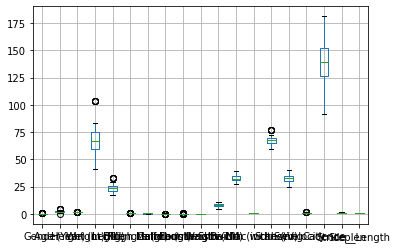%0A)

In \[190\]:

    #Range:
    min = merged_df.min()
    max = merged_df.max()

    df = pd.DataFrame(list(min))
    df['Highest Range'] = list(max)
    try:
        df = df.rename(columns = {0:'Lowest Range'})
    except:
        print("Columns have already been renamed.")

In \[191\]:

    df

Out\[191\]:

|     | Lowest Range | Highest Range |
|-----|--------------|---------------|
| 0   | 0.000000     | 1.000000      |
| 1   | 0.000000     | 5.000000      |
| 2   | 1.444444     | 1.871000      |
| 3   | 41.244444    | 103.820000    |
| 4   | 17.033706    | 33.102478     |
| 5   | 0.748333     | 1.019000      |
| 6   | 0.399444     | 0.566000      |
| 7   | 0.201111     | 0.506000      |
| 8   | 0.054444     | 0.690000      |
| 9   | 0.211667     | 0.291000      |
| 10  | 4.222222     | 10.600000     |
| 11  | 27.444444    | 39.200000     |
| 12  | 0.686667     | 0.996000      |
| 13  | 59.972090    | 76.611921     |
| 14  | 24.455553    | 40.719783     |
| 15  | 0.982107     | 1.555133      |
| 16  | 92.141404    | 181.252880    |
| 17  | 0.978052     | 1.606366      |
| 18  | 0.489026     | 0.803183      |

In \[192\]:

    #Quantiles - Q1, Q2, Q3, Q4
    merged_df.quantile([.25, .5, .75, 1])

Out\[192\]:

|      | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|------|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|---------|----------------------|---------------------|-----------|-----------|----------|------------|-------------|--------------|
| 0.25 | 0.0    | 2.0        | 1.644444   | 59.977778   | 21.079829 | 0.861389       | 0.452778         | 0.380000    | 0.070000            | 0.240000         | 7.0     | 31.166667            | 0.793333            | 65.295628 | 30.375243 | 1.095667 | 126.716792 | 1.129536    | 0.564768     |
| 0.50 | 0.0    | 2.0        | 1.694444   | 66.622222   | 23.517249 | 0.889722       | 0.486667         | 0.401111    | 0.070000            | 0.250000         | 8.0     | 32.000000            | 0.810000            | 67.640897 | 32.618600 | 1.154481 | 139.062700 | 1.219254    | 0.609627     |
| 0.75 | 0.0    | 3.0        | 1.745556   | 75.388889   | 25.667457 | 0.920000       | 0.508333         | 0.433333    | 0.079444            | 0.264861         | 9.0     | 35.000000            | 0.890000            | 69.817934 | 35.104665 | 1.237556 | 152.377421 | 1.341760    | 0.670880     |
| 1.00 | 1.0    | 5.0        | 1.871000   | 103.820000  | 33.102478 | 1.019000       | 0.566000         | 0.506000    | 0.690000            | 0.291000         | 10.6    | 39.200000            | 0.996000            | 76.611921 | 40.719783 | 1.555133 | 181.252880 | 1.606366    | 0.803183     |

In \[193\]:

    #K-percentile:
    k = int(input("Enter the value of K (out of 100 - percent): "))
    merged_df.quantile([k*0.01])

    Enter the value of K (out of 100 - percent): 47

Out\[193\]:

|      | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No  | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing  | Velocity | Cadence    | Stride\_len | Step\_Length |
|------|--------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|----------|----------------------|---------------------|-----------|--------|----------|------------|-------------|--------------|
| 0.47 | 0.0    | 2.0        | 1.676667   | 63.555556   | 22.661131 | 0.88           | 0.474444         | 0.393333    | 0.07                | 0.25             | 7.888889 | 32.0                 | 0.81                | 66.962913 | 31.951 | 1.132185 | 134.499768 | 1.194112    | 0.597056     |

In \[194\]:

    Q3_df = merged_df.quantile([.75]).reset_index()
    Q1_df = merged_df.quantile([.25]).reset_index()

    #Interquartile = Q3-Q1:
    (Q3_df - Q1_df).drop(columns=['index'])

Out\[194\]:

|     | Gender | Age (Year) | Height (m) | Weight (Kg) | BMI      | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No | Waist width (inches) | Bi-illiac width (m) | Stance   | Swing    | Velocity | Cadence   | Stride\_len | Step\_Length |
|-----|--------|------------|------------|-------------|----------|----------------|------------------|-------------|---------------------|------------------|---------|----------------------|---------------------|----------|----------|----------|-----------|-------------|--------------|
| 0   | 0.0    | 1.0        | 0.101111   | 15.411111   | 4.587628 | 0.058611       | 0.055556         | 0.053333    | 0.009444            | 0.024861         | 2.0     | 3.833333             | 0.096667            | 4.522307 | 4.729422 | 0.141889 | 25.660629 | 0.212224    | 0.106112     |

#### 4.1.7 TASK 7: Graphic Displays of Basic Statistical Descriptions<a href="#4.1.7-TASK-7:-Graphic-Displays-of-Basic-Statistical-Descriptions" class="anchor-link">¶</a>

Basic Statistical Descriptions of Data by Visually inspect the data
using the python packages - Bar charts - Pie charts - Line graphs -
Histograms - Scatter plots - BOX plots

#### BAR Charts for Gender, Age, Height, Weight, Leg Length<a href="#BAR-Charts-for-Gender,-Age,-Height,-Weight,-Leg-Length" class="anchor-link">¶</a>

In \[195\]:

    cols = ['Gender', 'Age (Year)', 'Height (m)', 'Weight (Kg)', 'Leg Length (m)']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    #Drawing bar graphs for (Gender w/ every column) and (Age w/ every column)
    for x in range(3):
        sns.barplot(ax=axes[0, x], data=merged_df, y=cols[0], x=cols[x+2])
        sns.barplot(ax=axes[1, x], data=merged_df, x=cols[1], y=cols[x+2])

![](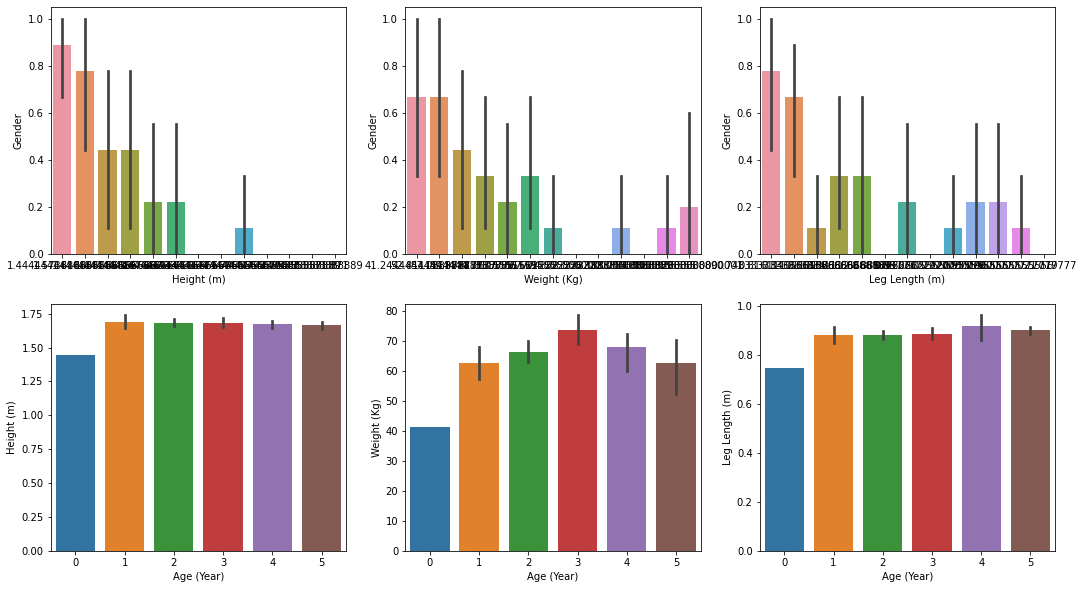%0A)

#### PIE Charts for Gender, Age, Height, Weight, Leg Length<a href="#PIE-Charts-for-Gender,-Age,-Height,-Weight,-Leg-Length" class="anchor-link">¶</a>

In \[196\]:

    cols = ['Gender', 'Age (Year)', 'Height (m)', 'Weight (Kg)', 'Leg Length (m)']

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    for index in range(5):
        x = np.array(list(merged_df[cols[index]]))
        uniqw, inverse = np.unique(x, return_inverse=True)
        y = np.bincount(inverse)
        ii = np.nonzero(y)[0]
        x = list(y[ii])
        y = list(ii)
        axes[int(index/3), (index%3)].pie(x, labels =y, autopct='%1.2f%%')
        axes[int(index/3), (index%3)].title.set_text(cols[index])

![](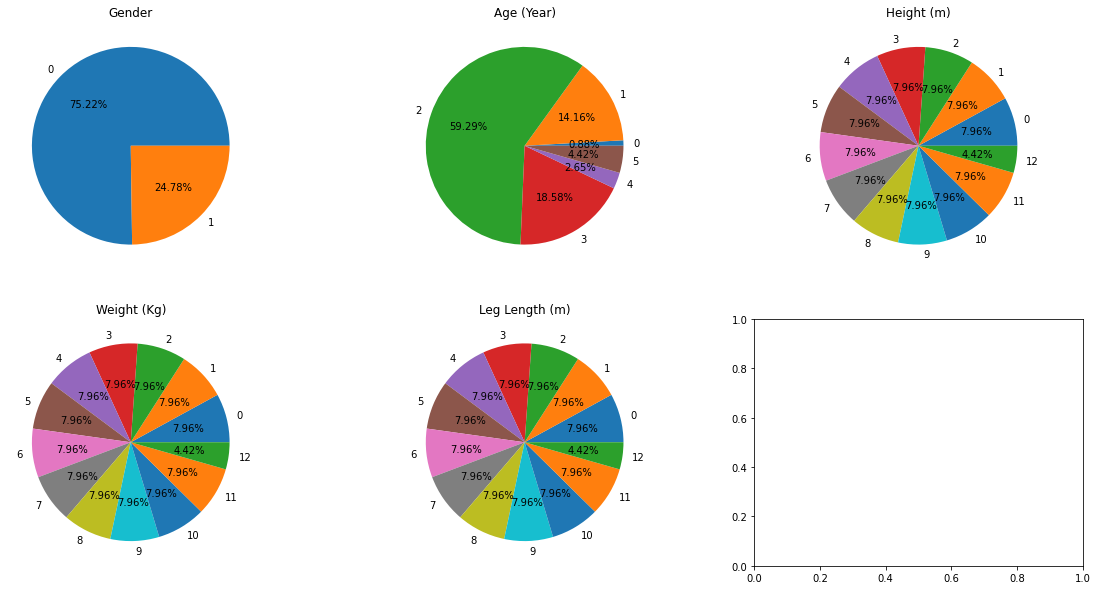%0A)

#### LINE graph for thigh length, calf length, M-height , Foot Length, Shoe No<a href="#LINE-graph-for-thigh-length,-calf-length,-M-height-,-Foot-Length,-Shoe-No" class="anchor-link">¶</a>

In \[197\]:

    cols = ['Thigh Length (m)', 'Calf Length', 'Mallelous height -L', 'Foot Length (cM)', 'Shoe No']

    fig, axes = plt.subplots(2, 2, figsize=(18, 10))

    #Drawing bar graphs for (Gender w/ every column) and (Age w/ every column)
    sns.lineplot(ax=axes[0, 0], x=cols[0], y=cols[1], data=merged_df) 
    sns.lineplot(ax=axes[0, 1], x=cols[0], y=cols[2], data=merged_df) 
    sns.lineplot(ax=axes[1, 0], x=cols[1], y=cols[2], data=merged_df) 
    sns.lineplot(ax=axes[1, 1], x=cols[3], y=cols[4], data=merged_df) 

Out\[197\]:

    <AxesSubplot:xlabel='Foot Length (cM)', ylabel='Shoe No'>

![](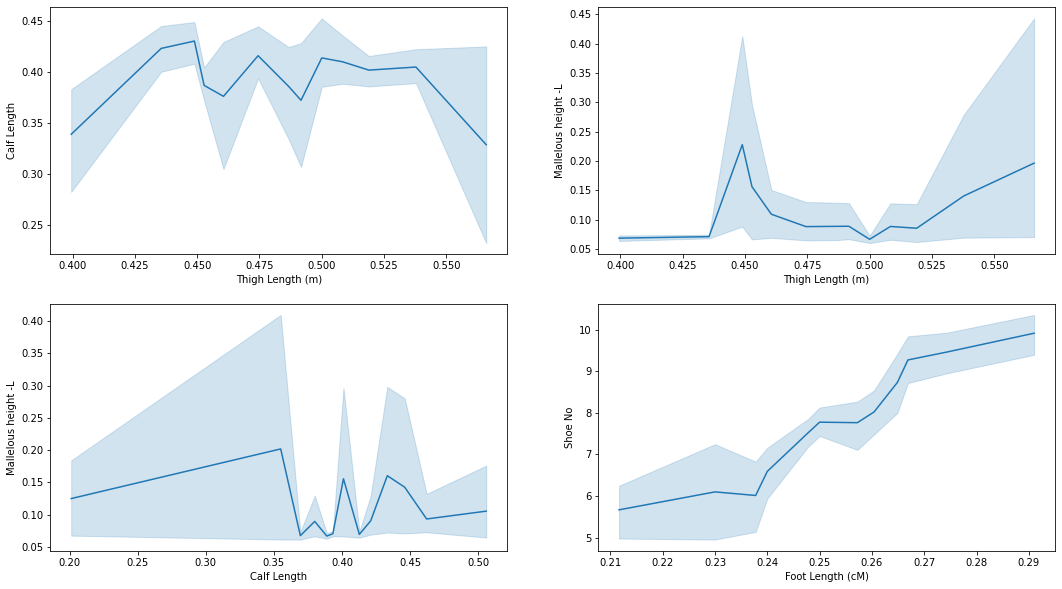%0A)

#### LINE graph for Knee\_Angle for 4 subejcts in a single plot<a href="#LINE-graph-for-Knee_Angle-for-4-subejcts-in-a-single-plot" class="anchor-link">¶</a>

In \[198\]:

    fig, axes = plt.subplots(1, 1, figsize=(20, 10))

    ka_df = all_sheets[2]["df"].transpose().reset_index().drop(columns=['index'])
    ka_df.columns = ka_df.iloc[0]
    ka_df = ka_df.iloc[1:]
    ka_df.plot(ax=axes)

Out\[198\]:

    <AxesSubplot:>

![](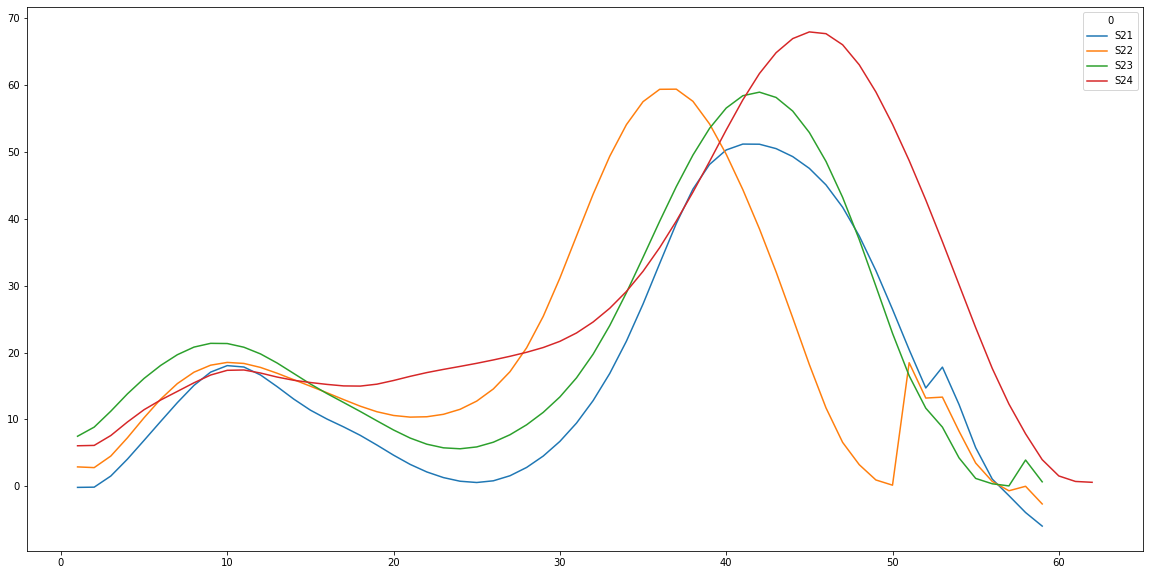%0A)

#### Histograms of the attributes<a href="#Histograms-of-the-attributes" class="anchor-link">¶</a>

In \[199\]:

    fig, axes = plt.subplots(4, 5, figsize=(20, 10))
    merged_df.hist(ax=axes.flatten()[:19])

Out\[199\]:

    array([<AxesSubplot:title={'center':'Gender'}>,
           <AxesSubplot:title={'center':'Age (Year)'}>,
           <AxesSubplot:title={'center':'Height (m)'}>,
           <AxesSubplot:title={'center':'Weight (Kg)'}>,
           <AxesSubplot:title={'center':'BMI'}>,
           <AxesSubplot:title={'center':'Leg Length (m)'}>,
           <AxesSubplot:title={'center':'Thigh Length (m)'}>,
           <AxesSubplot:title={'center':'Calf Length'}>,
           <AxesSubplot:title={'center':'Mallelous height -L'}>,
           <AxesSubplot:title={'center':'Foot Length (cM)'}>,
           <AxesSubplot:title={'center':'Shoe No'}>,
           <AxesSubplot:title={'center':'Waist width (inches)'}>,
           <AxesSubplot:title={'center':'Bi-illiac width (m)'}>,
           <AxesSubplot:title={'center':'Stance'}>,
           <AxesSubplot:title={'center':'Swing'}>,
           <AxesSubplot:title={'center':'Velocity'}>,
           <AxesSubplot:title={'center':'Cadence'}>,
           <AxesSubplot:title={'center':'Stride_len'}>,
           <AxesSubplot:title={'center':'Step_Length'}>], dtype=object)

![](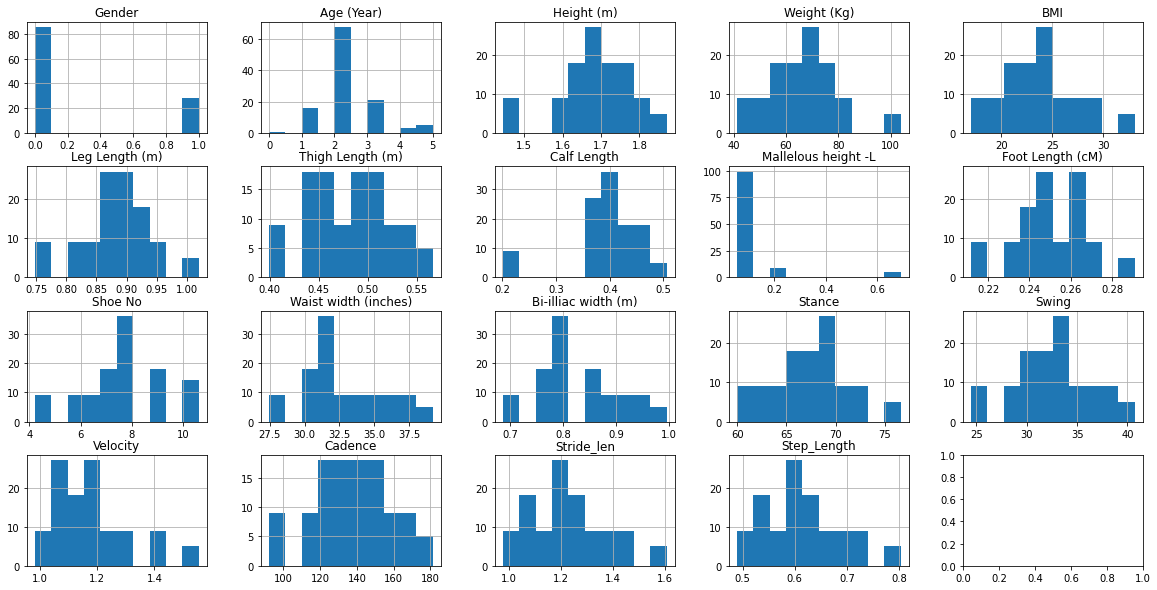%0A)

#### Scatter plots for Stance, Swing, Velocity, Cadence (Step/sec), Stride length , Step\_ Length from Spatio-Temporal sheet

In \[200\]:

    cols = ['Stance', 'Swing', 'Velocity', 'Cadence', 'Stride_len', 'Step_Length']

    fig, axes = plt.subplots(3, 2, figsize=(20, 10))

    for x in range(5):
        axes[int(x/2), x%2].scatter(merged_df[cols[x]], merged_df[cols[x+1]])
        axes[int(x/2), x%2].title.set_text(f"{cols[x]} vs {cols[x+1]}")

![](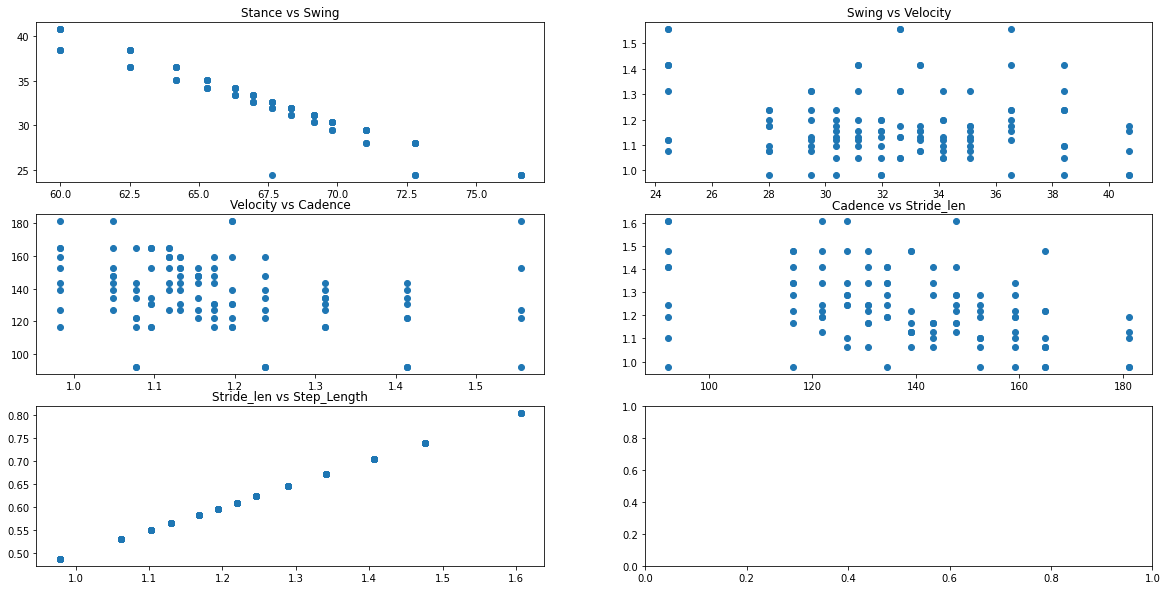%0A)

#### Boxplot for all the attributes :<a href="#Boxplot-for-all-the-attributes-:" class="anchor-link">¶</a>

-   it is a graphic display of five-number summary

In \[201\]:

    fig, axes = plt.subplots(1, 1, figsize=(20, 10))
    merged_df.boxplot()

Out\[201\]:

    <AxesSubplot:>

![](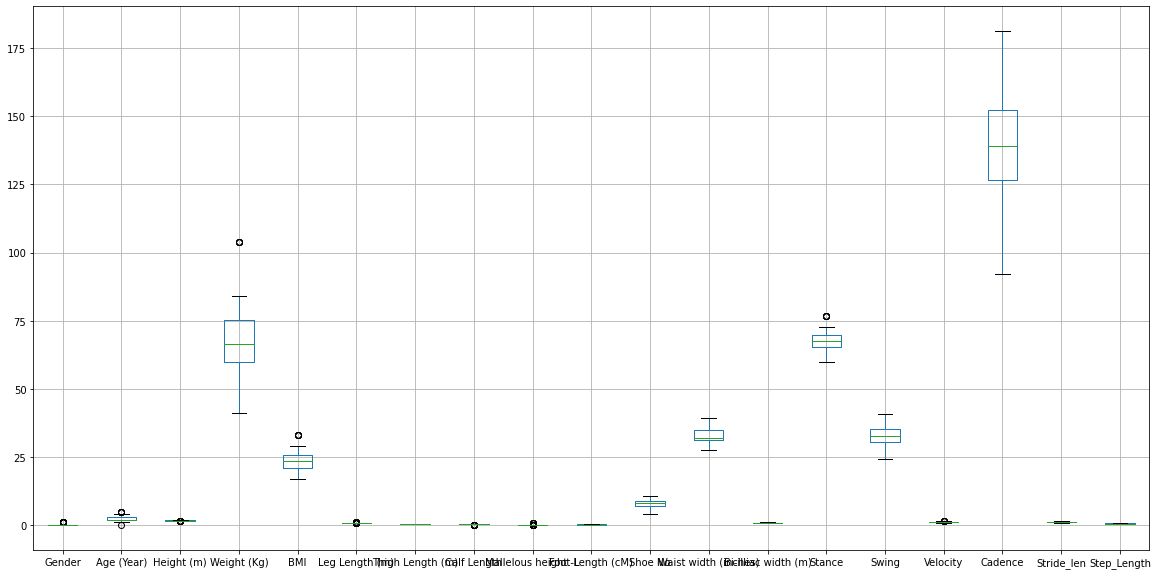%0A)

In \[202\]:

    ## YOUR OBSERVATIONS :
    # It is noticed that according to the data provided, men generally have more height, weight and leg length
    # The cadence value and the weight are varying quite a lot compared to the other features

#### 4.1.8 TASK 8: Data Integration<a href="#4.1.8-TASK-8:-Data-Integration" class="anchor-link">¶</a>

Consider that this dataset is result of joining 3 differnt related
datasets.  
Handling Redundancy in Data Integration  
Redundant attributes may be able to be detected by

-   Correlation analysis ( X^2 Chi-square test ) for Nominal Data
-   Correlation coefficient for Numeric Data
-   Covariance analysis for Numeric Data  
    YOU can write your own function or use python functions

In \[203\]:

    #Chi-Square function:
    def chi_square(col1, col2):
        chi_val = stats.chisquare(col1, col2)[0]
        if not math.isinf(chi_val):
            return chi_val
        return float('NaN')

In \[204\]:

    # Correlation analysis ( X^2 Chi-square test )
    chi_df = pd.DataFrame(columns=merged_df.columns)
    columns = merged_df.columns
    for col1 in columns:
      for col2 in columns:
        chi_df.loc[col1,col2] = chi_square(merged_df[col1],merged_df[col2])
    chi_df

    c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: invalid value encountered in true_divide
      terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp
    c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
      terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp

Out\[204\]:

|                      | Gender | Age (Year) | Height (m)     | Weight (Kg)  | BMI          | Leg Length (m) | Thigh Length (m) | Calf Length    | Mallelous height -L | Foot Length (cM) | Shoe No       | Waist width (inches) | Bi-illiac width (m) | Stance      | Swing        | Velocity       | Cadence      | Stride\_len    | Step\_Length   |
|----------------------|--------|------------|----------------|--------------|--------------|----------------|------------------|----------------|---------------------|------------------|---------------|----------------------|---------------------|-------------|--------------|----------------|--------------|----------------|----------------|
| Gender               | NaN    | NaN        | 151.822377     | 7508.608558  | 2600.712444  | 77.454492      | 59.003824        | 77.409784      | 364.552105          | 94.907072        | 814.940069    | 3656.405565          | 73.971613           | 7563.113163 | 3619.009816  | 102.290209     | 15508.969235 | 107.546507     | 61.749249      |
| Age (Year)           | NaN    | NaN        | 75.638409      | 7073.993769  | 2182.997542  | 327.476947     | 883.640009       | 1226.463501    | 8390.800941         | 2107.682624      | 455.147111    | 3230.674150          | 350.404486          | 7128.266980 | 3194.530323  | 176.391110     | 15069.698510 | 168.446338     | 627.549770     |
| Height (m)           | NaN    | NaN        | 0.000000       | 7189.114698  | 2289.495286  | 81.887000      | 343.363931       | 506.227251     | 3791.538848         | 922.903379       | 529.343770    | 3341.388315          | 100.532310          | 7243.560355 | 3304.206522  | 28.365307      | 15187.241829 | 22.716518      | 215.999664     |
| Weight (Kg)          | NaN    | NaN        | 295928.721564  | 0.000000     | 9339.136395  | 577771.473948  | 1081452.772133   | 1358358.468743 | 6724147.062258      | 2065747.098627   | 54042.337663  | 4383.048253          | 607303.751208       | 340.310604  | 5070.301160  | 435575.213699  | 4377.969350  | 418252.653788  | 851424.896869  |
| BMI                  | NaN    | NaN        | 33015.776467   | 3197.830246  | 0.000000     | 67275.018092   | 128610.168694    | 163204.679499  | 829723.396676       | 249919.528575    | 4109.134770   | 330.331966           | 70821.709984        | 3260.067767 | 366.844901   | 49606.422929   | 10732.598554 | 47516.785941   | 100135.220494  |
| Leg Length (m)       | NaN    | NaN        | 42.763028      | 7365.549620  | 2459.397223  | 0.000000       | 39.165982        | 76.881336      | 974.197222          | 182.196634       | 678.097016    | 3514.298479          | 1.426778            | 7420.100010 | 3476.979116  | 9.554938       | 15365.505780 | 12.608903      | 15.794113      |
| Thigh Length (m)     | NaN    | NaN        | 97.021972      | 7455.975669  | 2548.060823  | 21.000570      | 0.000000         | 5.691206       | 248.762447          | 24.512232        | 761.043389    | 3603.773169          | 17.310515           | 7510.558978 | 3566.412594  | 47.264368      | 15456.429793 | 52.587650      | 4.361517       |
| Calf Length          | NaN    | NaN        | 111.614926     | 7475.355540  | 2567.210316  | 31.182302      | 3.035958         | 0.000000       | 160.488643          | 10.922652        | 779.388798    | 3623.031038          | 26.889846           | 7529.946886 | 3585.665176  | 59.705746      | 15475.878678 | 65.289022      | 10.254251      |
| Mallelous height -L  | NaN    | NaN        | 166.909739     | 7539.111317  | 2630.557756  | 78.744809      | 36.257005        | 28.462658      | 0.000000            | 16.594024        | 841.436306    | 3686.561677          | 73.170701           | 7593.710003 | 3649.183492  | 111.159962     | 15539.747680 | 117.303025     | 50.302239      |
| Foot Length (cM)     | NaN    | NaN        | 137.455531     | 7507.462716  | 2599.011718  | 51.302252      | 12.476590        | 6.534423       | 48.513902           | 0.000000         | 810.213892    | 3654.971780          | 46.060468           | 7562.058193 | 3617.598293  | 82.643663      | 15508.070718 | 88.688268      | 24.779726      |
| Shoe No              | NaN    | NaN        | 2527.914570    | 5934.365627  | 1218.878681  | 6120.164766    | 12714.107998     | 16166.569591   | 86357.481466        | 25428.562869     | 0.000000      | 2189.717483          | 6642.821745         | 5989.945510 | 2157.937150  | 4323.621098    | 13884.846980 | 4060.417896    | 9643.501711    |
| Waist width (inches) | NaN    | NaN        | 65858.308606   | 2010.633187  | 500.303646   | 131820.045269  | 249567.688855    | 316582.829130  | 1595243.043542      | 482410.372839    | 10123.474254  | 0.000000             | 138994.309946       | 2023.867196 | 94.922925    | 97724.542776   | 9061.015126  | 93653.110285   | 194520.050490  |
| Bi-illiac width (m)  | NaN    | NaN        | 48.670928      | 7376.943106  | 2470.478769  | 1.219148       | 31.376194        | 64.887805      | 856.722191          | 155.587787       | 688.367480    | 3525.530782          | 0.000000            | 7431.516423 | 3488.237523  | 12.602829      | 15376.996367 | 16.257107      | 11.530506      |
| Stance               | NaN    | NaN        | 292899.336250  | 367.703737   | 9898.897462  | 570126.489428  | 1065707.049629   | 1352539.334340 | 6815067.294885      | 2050146.184800   | 56680.331927  | 4283.358967          | 608301.914820       | 0.000000    | 4769.142852  | 426523.870620  | 4168.048013  | 409185.975855  | 833400.754842  |
| Swing                | NaN    | NaN        | 65156.410074   | 2109.152010  | 609.285133   | 130698.246593  | 247528.458289    | 314874.208474  | 1568002.341923      | 478235.412617    | 10202.998262  | 90.476549            | 139669.054270       | 2099.784352 | 0.000000     | 97346.135076   | 9119.473045  | 92303.042807   | 191745.158964  |
| Velocity             | NaN    | NaN        | 18.593989      | 7300.065266  | 2395.881295  | 14.358977      | 122.161645       | 200.894870     | 1853.158865         | 398.678022       | 621.306260    | 3449.855916          | 19.883352           | 7354.549188 | 3412.616857  | 0.000000       | 15299.451992 | 2.901060       | 62.972790      |
| Cadence              | NaN    | NaN        | 1281040.555856 | 10869.191518 | 67675.026343 | 2463384.166372 | 4573689.777130   | 5841436.197777 | 28920954.795782     | 8786083.206352   | 276177.805469 | 40119.481335         | 2632915.690285      | 9153.183084 | 40944.547464 | 1870795.551590 | 0.000000     | 1801879.986169 | 3634683.815881 |
| Stride\_len          | NaN    | NaN        | 15.242759      | 7287.698403  | 2383.979464  | 19.645730      | 142.313581       | 224.862737     | 2025.030215         | 448.670194       | 610.793467    | 3437.743261          | 26.879873           | 7342.184258 | 3400.447884  | 3.078867       | 15286.967011 | 0.000000       | 69.781407      |
| Step\_Length         | NaN    | NaN        | 76.495749      | 7425.218443  | 2517.799433  | 10.100212      | 6.495871         | 19.816890      | 445.865719          | 63.666295        | 732.417202    | 3573.279657          | 7.573744            | 7479.788823 | 3535.922048  | 30.931362      | 15425.533756 | 34.890678      | 0.000000       |

In \[205\]:

    # Correlation Coefficent for Numeric Data
    merged_df.corr()

Out\[205\]:

|                      | Gender    | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No   | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity  | Cadence   | Stride\_len | Step\_Length |
|----------------------|-----------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|-----------|----------------------|---------------------|-----------|-----------|-----------|-----------|-------------|--------------|
| Gender               | 1.000000  | -0.270080  | -0.631645  | -0.387567   | -0.114162 | -0.411357      | -0.202672        | -0.427918   | -0.071567           | -0.672049        | -0.588998 | -0.330506            | -0.331314           | 0.061310  | -0.049201 | -0.184871 | 0.068847  | -0.182213   | -0.182214    |
| Age (Year)           | -0.270080 | 1.000000   | 0.007530   | 0.148005    | 0.224277  | 0.143621       | 0.263945         | 0.056121    | -0.035997           | 0.060137         | -0.003352 | 0.472595             | 0.457273            | 0.061376  | -0.105361 | 0.194703  | -0.130261 | 0.071359    | 0.071359     |
| Height (m)           | -0.631645 | 0.007530   | 1.000000   | 0.537966    | 0.078583  | 0.715751       | 0.455244         | 0.445532    | 0.158761            | 0.777211         | 0.692169  | 0.334775             | 0.346511            | -0.100225 | 0.092023  | -0.020872 | -0.054918 | 0.108507    | 0.108508     |
| Weight (Kg)          | -0.387567 | 0.148005   | 0.537966   | 1.000000    | 0.842434  | 0.368756       | 0.248700         | 0.261884    | 0.082764            | 0.518527         | 0.630143  | 0.669885             | 0.676490            | -0.011766 | -0.034015 | 0.068363  | -0.071334 | 0.010397    | 0.010397     |
| BMI                  | -0.114162 | 0.224277   | 0.078583   | 0.842434    | 1.000000  | 0.094131       | 0.081957         | 0.115311    | 0.006662            | 0.181386         | 0.365793  | 0.623799             | 0.628473            | 0.001665  | -0.055549 | 0.041475  | -0.079305 | -0.054520   | -0.054521    |
| Leg Length (m)       | -0.411357 | 0.143621   | 0.715751   | 0.368756    | 0.094131  | 1.000000       | 0.694860         | 0.555940    | 0.061773            | 0.566508         | 0.541575  | 0.235515             | 0.245119            | 0.053623  | -0.068879 | 0.013230  | -0.013389 | 0.053677    | 0.053677     |
| Thigh Length (m)     | -0.202672 | 0.263945   | 0.455244   | 0.248700    | 0.081957  | 0.694860       | 1.000000         | 0.022896    | 0.048829            | 0.339639         | 0.274878  | 0.197512             | 0.209913            | 0.039460  | -0.070801 | -0.033390 | -0.011975 | 0.047765    | 0.047765     |
| Calf Length          | -0.427918 | 0.056121   | 0.445532   | 0.261884    | 0.115311  | 0.555940       | 0.022896         | 1.000000    | -0.032056           | 0.405900         | 0.389098  | 0.164973             | 0.156205            | 0.030936  | -0.009157 | 0.016419  | -0.065552 | 0.161597    | 0.161596     |
| Mallelous height -L  | -0.071567 | -0.035997  | 0.158761   | 0.082764    | 0.006662  | 0.061773       | 0.048829         | -0.032056   | 1.000000            | 0.169896         | 0.063595  | 0.107215             | 0.090454            | -0.140183 | 0.122733  | -0.042156 | 0.103697  | 0.020522    | 0.020521     |
| Foot Length (cM)     | -0.672049 | 0.060137   | 0.777211   | 0.518527    | 0.181386  | 0.566508       | 0.339639         | 0.405900    | 0.169896            | 1.000000         | 0.755602  | 0.349628             | 0.333876            | -0.049175 | 0.018070  | 0.121913  | -0.128566 | 0.156216    | 0.156215     |
| Shoe No              | -0.588998 | -0.003352  | 0.692169   | 0.630143    | 0.365793  | 0.541575       | 0.274878         | 0.389098    | 0.063595            | 0.755602         | 1.000000  | 0.321743             | 0.340482            | -0.053069 | 0.040056  | 0.084311  | -0.165486 | 0.142376    | 0.142376     |
| Waist width (inches) | -0.330506 | 0.472595   | 0.334775   | 0.669885    | 0.623799  | 0.235515       | 0.197512         | 0.164973    | 0.107215            | 0.349628         | 0.321743  | 1.000000             | 0.977769            | 0.034592  | -0.064543 | 0.194923  | -0.122098 | 0.046101    | 0.046102     |
| Bi-illiac width (m)  | -0.331314 | 0.457273   | 0.346511   | 0.676490    | 0.628473  | 0.245119       | 0.209913         | 0.156205    | 0.090454            | 0.333876         | 0.340482  | 0.977769             | 1.000000            | 0.026911  | -0.050718 | 0.149466  | -0.121922 | 0.021201    | 0.021201     |
| Stance               | 0.061310  | 0.061376   | -0.100225  | -0.011766   | 0.001665  | 0.053623       | 0.039460         | 0.030936    | -0.140183           | -0.049175        | -0.053069 | 0.034592             | 0.026911            | 1.000000  | -0.962375 | 0.162295  | -0.016058 | -0.081423   | -0.081423    |
| Swing                | -0.049201 | -0.105361  | 0.092023   | -0.034015   | -0.055549 | -0.068879      | -0.070801        | -0.009157   | 0.122733            | 0.018070         | 0.040056  | -0.064543            | -0.050718           | -0.962375 | 1.000000  | -0.185734 | 0.036394  | 0.107454    | 0.107454     |
| Velocity             | -0.184871 | 0.194703   | -0.020872  | 0.068363    | 0.041475  | 0.013230       | -0.033390        | 0.016419    | -0.042156           | 0.121913         | 0.084311  | 0.194923             | 0.149466            | 0.162295  | -0.185734 | 1.000000  | -0.303994 | 0.318091    | 0.318091     |
| Cadence              | 0.068847  | -0.130261  | -0.054918  | -0.071334   | -0.079305 | -0.013389      | -0.011975        | -0.065552   | 0.103697            | -0.128566        | -0.165486 | -0.122098            | -0.121922           | -0.016058 | 0.036394  | -0.303994 | 1.000000  | -0.419084   | -0.419084    |
| Stride\_len          | -0.182213 | 0.071359   | 0.108507   | 0.010397    | -0.054520 | 0.053677       | 0.047765         | 0.161597    | 0.020522            | 0.156216         | 0.142376  | 0.046101             | 0.021201            | -0.081423 | 0.107454  | 0.318091  | -0.419084 | 1.000000    | 1.000000     |
| Step\_Length         | -0.182214 | 0.071359   | 0.108508   | 0.010397    | -0.054521 | 0.053677       | 0.047765         | 0.161596    | 0.020521            | 0.156215         | 0.142376  | 0.046102             | 0.021201            | -0.081423 | 0.107454  | 0.318091  | -0.419084 | 1.000000    | 1.000000     |

In \[206\]:

    # Covariance analysis for Numeric Data
    merged_df.cov()

Out\[206\]:

|                      | Gender    | Age (Year) | Height (m) | Weight (Kg) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Foot Length (cM) | Shoe No   | Waist width (inches) | Bi-illiac width (m) | Stance     | Swing      | Velocity  | Cadence    | Stride\_len | Step\_Length |
|----------------------|-----------|------------|------------|-------------|-----------|----------------|------------------|-------------|---------------------|------------------|-----------|----------------------|---------------------|------------|------------|-----------|------------|-------------|--------------|
| Gender               | 0.188053  | -0.106669  | -0.027189  | -2.300528   | -0.186001 | -0.010840      | -0.003604        | -0.012512   | -0.004157           | -0.005418        | -0.411961 | -0.421601            | -0.011071           | 0.105127   | -0.085442  | -0.011018 | 0.632288   | -0.012474   | -0.006237    |
| Age (Year)           | -0.106669 | 0.829488   | 0.000681   | 1.845109    | 0.767440  | 0.007949       | 0.009857         | 0.003446    | -0.004392           | 0.001018         | -0.004923 | 1.266122             | 0.032092            | 0.221027   | -0.384274  | 0.024370  | -2.512518  | 0.010259    | 0.005130     |
| Height (m)           | -0.027189 | 0.000681   | 0.009853   | 0.730927    | 0.029307  | 0.004317       | 0.001853         | 0.002982    | 0.002111            | 0.001434         | 0.110814  | 0.097749             | 0.002650            | -0.039336  | 0.036579   | -0.000285 | -0.115448  | 0.001700    | 0.000850     |
| Weight (Kg)          | -2.300528 | 1.845109   | 0.730927   | 187.361415  | 43.324190 | 0.306737       | 0.139591         | 0.241702    | 0.151760            | 0.131958         | 13.911721 | 26.972572            | 0.713534            | -0.636805  | -1.864516  | 0.128603  | -20.678964 | 0.022465    | 0.011233     |
| BMI                  | -0.186001 | 0.767440   | 0.029307   | 43.324190   | 14.115897 | 0.021492       | 0.012626         | 0.029212    | 0.003353            | 0.012670         | 2.216622  | 6.894151             | 0.181951            | 0.024740   | -0.835764  | 0.021415  | -6.310212  | -0.032335   | -0.016168    |
| Leg Length (m)       | -0.010840 | 0.007949   | 0.004317   | 0.306737    | 0.021492  | 0.003693       | 0.001732         | 0.002278    | 0.000503            | 0.000640         | 0.053082  | 0.042100             | 0.001148            | 0.012885   | -0.016762  | 0.000110  | -0.017231  | 0.000515    | 0.000257     |
| Thigh Length (m)     | -0.003604 | 0.009857   | 0.001853   | 0.139591    | 0.012626  | 0.001732       | 0.001681         | 0.000063    | 0.000268            | 0.000259         | 0.018180  | 0.023824             | 0.000663            | 0.006398   | -0.011626  | -0.000188 | -0.010400  | 0.000309    | 0.000155     |
| Calf Length          | -0.012512 | 0.003446   | 0.002982   | 0.241702    | 0.029212  | 0.002278       | 0.000063         | 0.004546    | -0.000290           | 0.000509         | 0.042315  | 0.032721             | 0.000812            | 0.008248   | -0.002473  | 0.000152  | -0.093607  | 0.001720    | 0.000860     |
| Mallelous height -L  | -0.004157 | -0.004392  | 0.002111   | 0.151760    | 0.003353  | 0.000503       | 0.000268         | -0.000290   | 0.017945            | 0.000423         | 0.013740  | 0.042249             | 0.000934            | -0.074252  | 0.065840   | -0.000776 | 0.294193   | 0.000434    | 0.000217     |
| Foot Length (cM)     | -0.005418 | 0.001018   | 0.001434   | 0.131958    | 0.012670  | 0.000640       | 0.000259         | 0.000509    | 0.000423            | 0.000346         | 0.022658  | 0.019121             | 0.000478            | -0.003615  | 0.001345   | 0.000312  | -0.050622  | 0.000458    | 0.000229     |
| Shoe No              | -0.411961 | -0.004923  | 0.110814   | 13.911721   | 2.216622  | 0.053082       | 0.018180         | 0.042315    | 0.013740            | 0.022658         | 2.601380  | 1.526484             | 0.042316            | -0.338441  | 0.258720   | 0.018688  | -5.652660  | 0.036250    | 0.018125     |
| Waist width (inches) | -0.421601 | 1.266122   | 0.097749   | 26.972572   | 6.894151  | 0.042100       | 0.023824         | 0.032721    | 0.042249            | 0.019121         | 1.526484  | 8.652935             | 0.221631            | 0.402339   | -0.760299  | 0.078801  | -7.606435  | 0.021407    | 0.010704     |
| Bi-illiac width (m)  | -0.011071 | 0.032092   | 0.002650   | 0.713534    | 0.181951  | 0.001148       | 0.000663         | 0.000812    | 0.000934            | 0.000478         | 0.042316  | 0.221631             | 0.005938            | 0.008199   | -0.015651  | 0.001583  | -0.198969  | 0.000258    | 0.000129     |
| Stance               | 0.105127  | 0.221027   | -0.039336  | -0.636805   | 0.024740  | 0.012885       | 0.006398         | 0.008248    | -0.074252           | -0.003615        | -0.338441 | 0.402339             | 0.008199            | 15.634315  | -15.238417 | 0.088192  | -1.344676  | -0.050823   | -0.025411    |
| Swing                | -0.085442 | -0.384274  | 0.036579   | -1.864516   | -0.835764 | -0.016762      | -0.011626        | -0.002473   | 0.065840            | 0.001345         | 0.258720  | -0.760299            | -0.015651           | -15.238417 | 16.036585  | -0.102220 | 3.086586   | 0.067928    | 0.033964     |
| Velocity             | -0.011018 | 0.024370   | -0.000285  | 0.128603    | 0.021415  | 0.000110       | -0.000188        | 0.000152    | -0.000776           | 0.000312         | 0.018688  | 0.078801             | 0.001583            | 0.088192   | -0.102220  | 0.018887  | -0.884792  | 0.006901    | 0.003450     |
| Cadence              | 0.632288  | -2.512518  | -0.115448  | -20.678964  | -6.310212 | -0.017231      | -0.010400        | -0.093607   | 0.294193            | -0.050622        | -5.652660 | -7.606435            | -0.198969           | -1.344676  | 3.086586   | -0.884792 | 448.517921 | -1.401068   | -0.700538    |
| Stride\_len          | -0.012474 | 0.010259   | 0.001700   | 0.022465    | -0.032335 | 0.000515       | 0.000309         | 0.001720    | 0.000434            | 0.000458         | 0.036250  | 0.021407             | 0.000258            | -0.050823  | 0.067928   | 0.006901  | -1.401068  | 0.024919    | 0.012460     |
| Step\_Length         | -0.006237 | 0.005130   | 0.000850   | 0.011233    | -0.016168 | 0.000257       | 0.000155         | 0.000860    | 0.000217            | 0.000229         | 0.018125  | 0.010704             | 0.000129            | -0.025411  | 0.033964   | 0.003450  | -0.700538  | 0.012460    | 0.006230     |

#### 4.1.9 TASK 9: Data Reduction Strategies<a href="#4.1.9-TASK-9:-Data-Reduction-Strategies" class="anchor-link">¶</a>

a\) Principal Components Analysis (PCA)  
b) Attributes Subset Selection

#### PCA Algorithm :<a href="#PCA-Algorithm-:" class="anchor-link">¶</a>

Given N data vectors from n-dimensions, find k ￿ n orthogonal vectors
(principal components) that can be best used to represent data

-   Normalize input data: Each attribute falls within the same range
-   Compute k orthonormal (unit) vectors, i.e., principal components
-   Each input data (vector) is a linear combination of the k principal
    component vectors
-   The principal components are sorted in order of decreasing
    “significance” or strength
-   Since the components are sorted, the size of the data can be reduced
    by eliminating the weak components, i.e., those with low variance
    (i.e., using the strongest principal components, it is possible to
    reconstruct a good approximation of the original data)

In \[207\]:

    ### Code for the PCA Analysis

    #Normalizing the merged_df:
    x = merged_df.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalized_df = pd.DataFrame(x_scaled)
    normalized_df.columns = merged_df.columns

    #PCA:
    pca = PCA(n_components=4)
    principalComponents = pca.fit_transform(x_scaled)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

    #Displaying the principal components (19 cols -> 4cols)
    principalDf

Out\[207\]:

|     | principal component 1 | principal component 2 | principal component 3 | principal component 4 |
|-----|-----------------------|-----------------------|-----------------------|-----------------------|
| 0   | -0.181584             | 0.272377              | -0.335334             | -0.129696             |
| 1   | -0.645300             | -0.036137             | -0.591320             | -0.554696             |
| 2   | 0.840721              | -0.566596             | 0.154273              | 0.250329              |
| 3   | 0.796097              | 0.251946              | 0.263341              | 0.475817              |
| 4   | -0.102788             | -0.495822             | -0.266362             | 0.048043              |
| ... | ...                   | ...                   | ...                   | ...                   |
| 108 | -0.687696             | -0.223543             | 0.515582              | -0.518925             |
| 109 | -0.152515             | -0.082977             | -0.276370             | -0.355714             |
| 110 | 0.067603              | -0.035744             | -0.195851             | -0.457838             |
| 111 | -0.096577             | -0.421158             | -0.283810             | -0.478322             |
| 112 | -0.404317             | 0.291566              | 0.423652              | -0.062814             |

113 rows × 4 columns

#### 9 b). Attributes Subset Selection<a href="#9-b).-Attributes-Subset-Selection" class="anchor-link">¶</a>

-   Redundant attributes

-   -   Duplicate much or all of the information contained in one or
        more other attributes

-   -   E.g., purchase price of a product and the amount of sales tax
        paid

-   Irrelevant attributes

-   -   Contain no information that is useful for the data mining task
        at hand

In \[208\]:

    #We can remove height and weight because we have BMI as a column that contains a better representation of these two combined:
    try:
        merged_df = merged_df.drop(columns=['Height (m)', 'Weight (Kg)'])
    except:
        print("These columns have already been dropped.")

In \[209\]:

    #We can also remove foot length because every subject is wearing a shoe and their foot length is not being considered in this particular experiment:
    try:
        merged_df = merged_df.drop(columns=['Foot Length (cM)'])
    except:
        print("The column have already been dropped.")

    merged_df

Out\[209\]:

|     | Gender | Age (Year) | BMI       | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Shoe No   | Waist width (inches) | Bi-illiac width (m) | Stance    | Swing     | Velocity | Cadence    | Stride\_len | Step\_Length |
|-----|--------|------------|-----------|----------------|------------------|-------------|---------------------|-----------|----------------------|---------------------|-----------|-----------|----------|------------|-------------|--------------|
| 0   | 0      | 2          | 20.507301 | 0.935556       | 0.518889         | 0.412778    | 0.075000            | 7.888889  | 31.166667            | 0.770000            | 66.287618 | 34.156404 | 1.095667 | 116.193079 | 1.219254    | 0.609627     |
| 1   | 0      | 2          | 19.543862 | 1.019000       | 0.566000         | 0.506000    | 0.080000            | 10.600000 | 32.000000            | 0.810000            | 71.031142 | 29.491189 | 0.982107 | 152.377421 | 1.194112    | 0.597056     |
| 2   | 1      | 2          | 25.667457 | 0.816111       | 0.452778         | 0.355000    | 0.690000            | 4.222222  | 34.055556            | 0.871111            | 69.149436 | 30.375243 | 1.048167 | 152.377421 | 1.102635    | 0.551312     |
| 3   | 1      | 2          | 24.078185 | 0.816111       | 0.491667         | 0.201111    | 0.072778            | 7.888889  | 30.000000            | 0.770000            | 62.518417 | 36.552756 | 1.173519 | 116.193079 | 1.341760    | 0.670880     |
| 4   | 0      | 1          | 26.926892 | 0.846667       | 0.474444         | 0.369444    | 0.080000            | 8.000000  | 33.277778            | 0.871111            | 68.309698 | 31.951000 | 0.982107 | 116.193079 | 0.978052    | 0.489026     |
| ... | ...    | ...        | ...       | ...            | ...              | ...         | ...                 | ...       | ...                  | ...                 | ...       | ...       | ...      | ...        | ...         | ...          |
| 108 | 0      | 2          | 25.667457 | 0.897778       | 0.474444         | 0.421111    | 0.062778            | 9.000000  | 35.888889            | 0.948889            | 76.611921 | 24.455553 | 1.311963 | 134.499768 | 1.341760    | 0.670880     |
| 109 | 0      | 2          | 21.870881 | 0.962778       | 0.491667         | 0.462222    | 0.070000            | 8.000000  | 31.166667            | 0.844444            | 69.817934 | 30.375243 | 1.132185 | 139.062700 | 1.129536    | 0.564768     |
| 110 | 0      | 2          | 23.517249 | 0.880000       | 0.491667         | 0.388889    | 0.070000            | 6.666667  | 30.000000            | 0.760000            | 67.640897 | 24.455553 | 1.118593 | 143.355290 | 1.167500    | 0.583750     |
| 111 | 0      | 5          | 22.661131 | 0.905556       | 0.486667         | 0.412778    | 0.054444            | 7.888889  | 32.000000            | 0.810000            | 71.031142 | 28.020426 | 1.173519 | 152.377421 | 0.978052    | 0.489026     |
| 112 | 0      | 4          | 21.079829 | 0.935556       | 0.537778         | 0.388889    | 0.062778            | 7.000000  | 35.888889            | 0.916667            | 68.309698 | 31.951000 | 1.196333 | 121.812645 | 1.476545    | 0.738273     |

113 rows × 16 columns

#### Attributes Creation<a href="#Attributes-Creation" class="anchor-link">¶</a>

#### Add a column or Row<a href="#Add-a-column-or-Row" class="anchor-link">¶</a>

In \[210\]:

    # There isn't any column that can be added from the given attributes because they're all fairly unrelated 
    # that we cant find any relation among any two or more columns

#### 4.1.10 TASK 10). Data Transformation Methods :<a href="#4.1.10-TASK-10).-Data-Transformation-Methods-:" class="anchor-link">¶</a>

-   Smoothing: Remove noise from data

-   Attribute/feature construction -New attributes constructed from the
    given ones

-   Aggregation: Summarization, data cube construction

-   Normalization: Scaled to fall within a smaller, specified range

-   -   min-max normalization

-   -   Standard Normalization / Standardization or Z-score
        Normalization

-   -   normalization by decimal scaling

In \[211\]:

    # What is the need of Normalization / Standardizing the data ?

Data Normalization is only needed when the range of data or the scale of
data is different among all the attributes of a given data set.
Normalization makes every data within a certain scale, so it is easier
to compare values when the scales are the same foa all the attributes.
Comparison between different attributes become much more easier to
visualize/analyse.

#### Apply Normalization on Knee\_Angle for 4 subejcts in a single plot.<a href="#Apply-Normalization-on-Knee_Angle-for-4-subejcts-in-a-single-plot." class="anchor-link">¶</a>

In \[212\]:

    #Transposing the given knee_angle dataframe:
    ka_df = all_sheets[2]["df"].transpose().reset_index().drop(columns=['index'])
    columns = ka_df.iloc[0]
    ka_df = ka_df.iloc[1:]

    #Normalizing the dataframe:
    x = ka_df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    ka_df = pd.DataFrame(x_scaled)
    ka_df.columns = columns

    #Multiplying the dataframe values by 100 to get within a range of 1-100 and displaying:
    ka_df=ka_df*100
    ka_df.plot()

Out\[212\]:

    <AxesSubplot:>

![](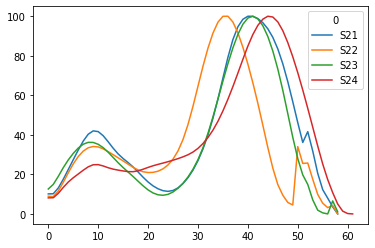%0A)

In \[213\]:

    #Displaying the knee_angle dataframe that was normalized to a range of 1-100
    ka_df

Out\[213\]:

|     | S21       | S22       | S23       | S24       |
|-----|-----------|-----------|-----------|-----------|
| 0   | 10.131859 | 8.932573  | 12.610472 | 8.113273  |
| 1   | 10.189980 | 8.761040  | 14.928943 | 8.192551  |
| 2   | 13.105784 | 11.548713 | 18.976438 | 10.386934 |
| 3   | 17.530907 | 15.956283 | 23.379659 | 13.393438 |
| 4   | 22.440214 | 20.786234 | 27.298132 | 16.122458 |
| ... | ...       | ...       | ...       | ...       |
| 57  | 3.550542  | 4.258916  | 6.567746  | 10.769579 |
| 58  | 0.000000  | 0.000000  | 1.039434  | 5.025882  |
| 59  | NaN       | NaN       | NaN       | 1.410001  |
| 60  | NaN       | NaN       | NaN       | 0.190607  |
| 61  | NaN       | NaN       | NaN       | 0.000000  |

62 rows × 4 columns

#### Apply normalization on the attributes of the dataset<a href="#Apply-normalization-on-the-attributes-of-the-dataset" class="anchor-link">¶</a>

In \[214\]:

    #Normalizing merged_df:
    cols = merged_df.columns
    x = merged_df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    merged_df = pd.DataFrame(x_scaled)
    merged_df.columns = cols
    merged_df

Out\[214\]:

|     | Gender | Age (Year) | BMI      | Leg Length (m) | Thigh Length (m) | Calf Length | Mallelous height -L | Shoe No  | Waist width (inches) | Bi-illiac width (m) | Stance   | Swing    | Velocity | Cadence  | Stride\_len | Step\_Length |
|-----|--------|------------|----------|----------------|------------------|-------------|---------------------|----------|----------------------|---------------------|----------|----------|----------|----------|-------------|--------------|
| 0   | 0.0    | 0.4        | 0.216171 | 0.691708       | 0.717145         | 0.694242    | 0.032343            | 0.574913 | 0.316635             | 0.269397            | 0.379543 | 0.596453 | 0.198175 | 0.269905 | 0.383887    | 0.383887     |
| 1   | 0.0    | 0.4        | 0.156213 | 1.000000       | 1.000000         | 1.000000    | 0.040210            | 1.000000 | 0.387524             | 0.398707            | 0.664613 | 0.309614 | 0.000000 | 0.675963 | 0.343873    | 0.343873     |
| 2   | 1.0    | 0.4        | 0.537300 | 0.250411       | 0.320213         | 0.504738    | 1.000000            | 0.000000 | 0.562382             | 0.596264            | 0.551529 | 0.363970 | 0.115281 | 0.675963 | 0.198281    | 0.198264     |
| 3   | 1.0    | 0.4        | 0.438396 | 0.250411       | 0.553702         | 0.000000    | 0.028846            | 0.574913 | 0.217391             | 0.269397            | 0.153026 | 0.743792 | 0.334036 | 0.269905 | 0.578863    | 0.578863     |
| 4   | 0.0    | 0.2        | 0.615678 | 0.363300       | 0.450300         | 0.552114    | 0.040210            | 0.592334 | 0.496219             | 0.596264            | 0.501063 | 0.460855 | 0.000000 | 0.269905 | 0.000000    | 0.000000     |
| ... | ...    | ...        | ...      | ...            | ...              | ...         | ...                 | ...      | ...                  | ...                 | ...      | ...      | ...      | ...      | ...         | ...          |
| 108 | 0.0    | 0.4        | 0.537300 | 0.552135       | 0.450300         | 0.721574    | 0.013112            | 0.749129 | 0.718336             | 0.847701            | 1.000000 | 0.000000 | 0.575638 | 0.475341 | 0.578863    | 0.578863     |
| 109 | 0.0    | 0.4        | 0.301030 | 0.792282       | 0.553702         | 0.856414    | 0.024476            | 0.592334 | 0.316635             | 0.510057            | 0.591703 | 0.363970 | 0.261904 | 0.526546 | 0.241096    | 0.241096     |
| 110 | 0.0    | 0.4        | 0.403487 | 0.486453       | 0.553702         | 0.615889    | 0.024476            | 0.383275 | 0.217391             | 0.237069            | 0.460870 | 0.000000 | 0.238183 | 0.574717 | 0.301518    | 0.301518     |
| 111 | 0.0    | 1.0        | 0.350209 | 0.580870       | 0.523682         | 0.694242    | 0.000000            | 0.574913 | 0.387524             | 0.398707            | 0.664613 | 0.219185 | 0.334036 | 0.675963 | 0.000000    | 0.000000     |
| 112 | 0.0    | 0.8        | 0.251800 | 0.691708       | 0.830554         | 0.615889    | 0.013112            | 0.435540 | 0.718336             | 0.743534            | 0.501063 | 0.460855 | 0.373850 | 0.332968 | 0.793382    | 0.793382     |

113 rows × 16 columns

### 5 Your Learning and observation :<a href="#5-Your-Learning-:" class="anchor-link">¶</a>
Through this assignment I  come to knowabout normalization , attribute subset selection, comparing dataset by histogram piechart and filling missing value etc